Dicionário de Dados data_ini_SE : Primeiro dia da semana epidemiológica (Domingo)

SE: Semana epidemiológica

casos_est : Número estimado de casos por semana usando o modelo de nowcasting (nota: Os valores são atualizados retrospectivamente a cada semana) cases_est_min and cases_est_max: Intervalo de credibilidade de 95% do número estimado de casos

casos: Número de casos notificados por semana (Os valores são atualizados retrospectivamente todas as semanas)

p_rt1: Probabilidade de (Rt> 1). Para emitir o alerta laranja, usamos o critério p_rt1> 0,95 por 3 semanas ou mais.

p_inc100k: Taxa de incidência estimada por 100.000

Localidade_id: Divisão submunicipal (atualmente implementada apenas no Rio de Janeiro)

nivel: Nível de alerta (1 = verde, 2 = amarelo, 3 = laranja, 4 = vermelho), mais detalhes, consulte (Saiba mais)

id: Índice numérico

versao_modelo: Versão do modelo (uso interno)

Rt: Estimativa pontual do número reprodutivo de casos, ver Saiba Mais

pop: População estimada (IBGE)

tempmin: Média das temperaturas mínimas diárias ao longo da semana

tempmed: Média das temperaturas diárias ao longo da semana

tempmax: Média das temperaturas máximas diárias ao longo da semana

umidmin: Média da umidade relativa mínima diária do ar ao longo da semana

umidmed: Média da umidade relativa diária do ar ao longo da semana

umidmax: Média da umidade relativa máxima diária do ar ao longo da seman a receptivo: Indica receptividade climática, ou seja, condições para alta capacidade vetorial. 0 = desfavorável, 1 = favorável, 2 = favorável nesta semana e na semana passada, 3 = favorável por pelo menos três semanas (suficiente para completar um ciclo de transmissão)

transmissao: Evidência de transmissão sustentada: 0 = nenhuma evidência, 1 = possível, 2 = provável, 3 = altamente provável

nivel_inc: Incidência estimada abaixo do limiar pré-epidemia, 1 = acima do limiar pré-epidemia, mas abaixo do limiar epidêmico, 2 = acima do limiar epidêmico

notif_accum_year: Número acumulado de casos no ano

In [2]:
! pip install matplotlib
! pip install seaborn
! pip install numpy
! pip install requests
! pip install pandas


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import pandas as pd
from urllib.error import URLError
from io import StringIO  # Para ler a resposta da API como um arquivo CSV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [3]:
! pip install requests
! pip install pandas

import requests
import pandas as pd
from urllib.error import URLError
from io import StringIO  # Para ler a resposta da API como um arquivo CSV

# fonte(https://info.dengue.mat.br/services/api)

# URL da API
url = 'https://info.dengue.mat.br/api/alertcity'

# Dicionário com os geocodes e nomes dos municípios do Ceará
municipios_ceara = {
    "2300101": "Abaiara",
    "2300150": "Acarape",
    "2300200": "Acaraú",
    "2300309": "Acopiara",
    "2300408": "Aiuaba",
    "2300507": "Alcântaras",
    "2300606": "Altaneira",
    "2300705": "Alto Santo",
    "2300754": "Amontada",
    "2300804": "Antonina do Norte",
    "2300903": "Apuiarés",
    "2301000": "Aquiraz",
    "2301109": "Aracati",
    "2301208": "Aracoiaba",
    "2301257": "Ararendá",
    "2301307": "Araripe",
    "2301406": "Aratuba",
    "2301505": "Arneiroz",
    "2301604": "Assaré",
    "2301703": "Aurora",
    "2301802": "Baixio",
    "2301851": "Banabuiú",
    "2301901": "Barbalha",
    "2301950": "Barreira",
    "2302008": "Barro",
    "2302057": "Barroquinha",
    "2302107": "Baturité",
    "2302206": "Beberibe",
    "2302305": "Bela Cruz",
    "2302404": "Boa Viagem",
    "2302503": "Brejo Santo",
    "2302602": "Camocim",
    "2302701": "Campos Sales",
    "2302800": "Canindé",
    "2302909": "Capistrano",
    "2303006": "Caridade",
    "2303105": "Cariré",
    "2303204": "Caririaçu",
    "2303303": "Cariús",
    "2303402": "Carnaubal",
    "2303501": "Cascavel",
    "2303600": "Catarina",
    "2303659": "Catunda",
    "2303709": "Caucaia",
    "2303808": "Cedro",
    "2303907": "Chaval",
    "2303931": "Choró",
    "2303956": "Chorozinho",
    "2304004": "Coreaú",
    "2304103": "Crateús",
    "2304202": "Crato",
    "2304236": "Croatá",
    "2304251": "Cruz",
    "2304269": "Deputado Irapuan Pinheiro",
    "2304277": "Ererê",
    "2304285": "Eusébio",
    "2304301": "Farias Brito",
    "2304350": "Forquilha",
    "2304400": "Fortaleza",
    "2304459": "Fortim",
    "2304509": "Frecheirinha",
    "2304608": "General Sampaio",
    "2304657": "Graça",
    "2304707": "Granja",
    "2304806": "Granjeiro",
    "2304905": "Groaíras",
    "2304954": "Guaiúba",
    "2305001": "Guaraciaba do Norte",
    "2305100": "Guaramiranga",
    "2305209": "Hidrolândia",
    "2305233": "Horizonte",
    "2305266": "Ibaretama",
    "2305308": "Ibiapina",
    "2305332": "Ibicuitinga",
    "2305357": "Icapuí",
    "2305407": "Icó",
    "2305506": "Iguatu",
    "2305605": "Independência",
    "2305654": "Ipaporanga",
    "2305704": "Ipaumirim",
    "2305803": "Ipu",
    "2305902": "Ipueiras",
    "2306009": "Iracema",
    "2306108": "Irauçuba",
    "2306207": "Itaiçaba",
    "2306256": "Itaitinga",
    "2306306": "Itapajé",
    "2306405": "Itapipoca",
    "2306504": "Itapiúna",
    "2306553": "Itarema",
    "2306603": "Itatira",
    "2306702": "Jaguaretama",
    "2306801": "Jaguaribara",
    "2306900": "Jaguaribe",
    "2307007": "Jaguaruana",
    "2307106": "Jardim",
    "2307205": "Jati",
    "2307254": "Jijoca de Jericoacoara",
    "2307304": "Juazeiro do Norte",
    "2307403": "Jucás",
    "2307502": "Lavras da Mangabeira",
    "2307601": "Limoeiro do Norte",
    "2307635": "Madalena",
    "2307650": "Maracanaú",
    "2307700": "Maranguape",
    "2307809": "Marco",
    "2307908": "Martinópole",
    "2308005": "Massapê",
    "2308104": "Mauriti",
    "2308203": "Meruoca",
    "2308302": "Milagres",
    "2308351": "Milhã",
    "2308377": "Miraíma",
    "2308401": "Missão Velha",
    "2308500": "Mombaça",
    "2308609": "Monsenhor Tabosa",
    "2308708": "Morada Nova",
    "2308807": "Moraújo",
    "2308906": "Morrinhos",
    "2309003": "Mucambo",
    "2309102": "Mulungu",
    "2309201": "Nova Olinda",
    "2309300": "Nova Russas",
    "2309409": "Novo Oriente",
    "2309458": "Ocara",
    "2309508": "Orós",
    "2309607": "Pacajus",
    "2309706": "Pacatuba",
    "2309805": "Pacoti",
    "2309904": "Pacujá",
    "2310001": "Palhano",
    "2310100": "Palmácia",
    "2310209": "Paracuru",
    "2310258": "Paraipaba",
    "2310308": "Parambu",
    "2310407": "Paramoti",
    "2310506": "Pedra Branca",
    "2310605": "Penaforte",
    "2310704": "Pentecoste",
    "2310803": "Pereiro",
    "2310852": "Pindoretama",
    "2310902": "Piquet Carneiro",
    "2310951": "Pires Ferreira",
    "2311009": "Poranga",
    "2311108": "Porteiras",
    "2311207": "Potengi",
    "2311231": "Potiretama",
    "2311264": "Quiterianópolis",
    "2311306": "Quixadá",
    "2311355": "Quixelô",
    "2311405": "Quixeramobim",
    "2311504": "Quixeré",
    "2311603": "Redenção",
    "2311702": "Reriutaba",
    "2311801": "Russas",
    "2311900": "Saboeiro",
    "2311959": "Salitre",
    "2312007": "Santana do Acaraú",
    "2312106": "Santana do Cariri",
    "2312205": "Santa Quitéria",
    "2312304": "São Benedito",
    "2312403": "São Gonçalo do Amarante",
    "2312502": "São João do Jaguaribe",
    "2312601": "São Luís do Curu",
    "2312700": "Senador Pompeu",
    "2312809": "Senador Sá",
    "2312908": "Sobral",
    "2313005": "Solonópole",
    "2313104": "Tabuleiro do Norte",
    "2313203": "Tamboril",
    "2313252": "Tarrafas",
    "2313302": "Tauá",
    "2313351": "Tejuçuoca",
    "2313401": "Tianguá",
    "2313500": "Trairi",
    "2313559": "Tururu",
    "2313609": "Ubajara",
    "2313708": "Umari",
    "2313757": "Umirim",
    "2313807": "Uruburetama",
    "2313906": "Uruoca",
    "2313955": "Varjota",
    "2314003": "Várzea Alegre",
    "2314102": "Viçosa do Ceará"
}

# Função para buscar dados de um município
def buscar_dados_municipio(geocode, municipio):
    search_filter = (
        f'geocode={geocode}&disease=dengue&format=csv&' +  # Geocode do município
        'ew_start=1&ew_end=52&ey_start=2014&ey_end=2025'  # Período desejado
    )
    try:
        response = requests.get('%s?%s' % (url, search_filter))
        response.raise_for_status()  # Verifica se a requisição foi bem-sucedida
        dados = pd.read_csv(StringIO(response.text))
        dados['municipio'] = municipio  # Adiciona o nome do município ao DataFrame
        return dados
    except requests.exceptions.RequestException as e:
        print(f"Erro ao buscar dados para o município {municipio} ({geocode}): {e}")
        return pd.DataFrame()  # Retorna um DataFrame vazio em caso de erro

# Função principal
def main():
    # Lista para armazenar os dados de todos os municípios
    dados_totais = []

    # Iterar sobre os geocodes e buscar dados
    for geocode, municipio in municipios_ceara.items():
        print(f"Buscando dados para o município {municipio} ({geocode})...")
        dados_municipio = buscar_dados_municipio(geocode, municipio)
        if not dados_municipio.empty:
            dados_totais.append(dados_municipio)

    # Concatenar todos os dados em um único DataFrame
    if dados_totais:
        df = pd.concat(dados_totais, ignore_index=True)

        # Exibir as primeiras linhas do DataFrame
        print("\nTabela de dados carregada:")
        print(df.head())

        # Salvar os dados em um arquivo CSV
        df.to_csv("dengue_ce_municipios_2014_2025.csv", index=False)
        print("\nDados salvos em 'dengue_ce_municipios_2014_2025.csv'")
    else:
        print("Nenhum dado foi encontrado para os municípios do Ceará.")

# Executar o programa
if __name__ == "__main__":
    main()

Buscando dados para o município Abaiara (2300101)...
Buscando dados para o município Acarape (2300150)...
Buscando dados para o município Acaraú (2300200)...
Buscando dados para o município Acopiara (2300309)...
Buscando dados para o município Aiuaba (2300408)...
Buscando dados para o município Alcântaras (2300507)...
Buscando dados para o município Altaneira (2300606)...
Buscando dados para o município Alto Santo (2300705)...
Buscando dados para o município Amontada (2300754)...
Buscando dados para o município Antonina do Norte (2300804)...
Buscando dados para o município Apuiarés (2300903)...
Buscando dados para o município Aquiraz (2301000)...
Buscando dados para o município Aracati (2301109)...
Buscando dados para o município Aracoiaba (2301208)...
Buscando dados para o município Ararendá (2301257)...
Buscando dados para o município Araripe (2301307)...
Buscando dados para o município Aratuba (2301406)...
Buscando dados para o município Arneiroz (2301505)...
Buscando dados para o m

KeyboardInterrupt: 

In [3]:


# Carregar o arquivo CSV com os dados
df = pd.read_csv('dengue_ce_municipios_2014_2025.csv')

#primeiras linhas do DataFrame
print(df.head())


print(df.describe())

# Or, access specific columns:
print(df['municipio'].unique())

   data_iniSE      SE  casos_est  casos_est_min  casos_est_max  casos  \
0  2025-03-16  202512        0.0              0              0      0   
1  2025-03-09  202511        1.0              1              1      1   
2  2025-03-02  202510        1.0              1              1      1   
3  2025-02-23  202509        0.0              0              0      0   
4  2025-02-16  202508        0.0              0              0      0   

      p_rt1  p_inc100k  Localidade_id  nivel  ...    umidmin    tempmed  \
0  0.000000   0.000000              0      1  ...  53.483800  25.446033   
1  0.812031  10.341262              0      1  ...  33.998257  27.437771   
2  0.927885  10.341262              0      1  ...  33.144743  27.608343   
3  0.000000   0.000000              0      1  ...  31.404743  28.193586   
4  0.000000   0.000000              0      1  ...  32.400400  28.076086   

     tempmax  casprov  casprov_est  casprov_est_min  casprov_est_max  casconf  \
0  29.115133      0.0        

In [4]:
df.head()

,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,...,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,municipio
0,2025-03-16,202512,0.0,0,0,0,0.000000,0.000000,0,1,...,53.483800,25.446033,29.115133,0.0,NaN,NaN,NaN,NaN,608,Abaiara
1,2025-03-09,202511,1.0,1,1,1,0.812031,10.341262,0,1,...,33.998257,27.437771,32.532629,0.0,NaN,NaN,NaN,NaN,608,Abaiara
2,2025-03-02,202510,1.0,1,1,1,0.927885,10.341262,0,1,...,33.144743,27.608343,32.751614,0.0,NaN,NaN,NaN,NaN,608,Abaiara
3,2025-02-23,202509,0.0,0,0,0,0.000000,0.000000,0,1,...,31.404743,28.193586,33.211271,0.0,NaN,NaN,NaN,NaN,608,Abaiara
4,2025-02-16,202508,0.0,0,0,0,0.000000,0.000000,0,1,...,32.400400,28.076086,33.308586,0.0,NaN,NaN,NaN,NaN,608,Abaiara


In [5]:
df.isnull().sum()

data_iniSE               0
SE                       0
casos_est                0
casos_est_min            0
casos_est_max            0
casos                    0
p_rt1                    0
p_inc100k                0
Localidade_id            0
nivel                    0
id                       0
versao_modelo            0
tweet                16744
Rt                       0
pop                      0
tempmin               2555
umidmax                 13
receptivo                0
transmissao              0
nivel_inc                0
umidmed               2568
umidmin               2568
tempmed               2568
tempmax               2568
casprov                184
casprov_est         107824
casprov_est_min     107824
casprov_est_max     107824
casconf             107824
notif_accum_year         0
municipio                0
dtype: int64

In [14]:
# 2. Verificar valores ausentes
print("Valores ausentes por coluna:")
df.isnull().sum()

# Tratar valores ausentes (preencher com 0 ou média, dependendo do contexto)
df.fillna(0, inplace=True)

# 3. Verificar tipos de dados
print("\nTipos de dados por coluna:")
print(df.dtypes)
# Converter colunas para tipos de dados apropriados, se necessário
df['data_iniSE'] = pd.to_datetime(df['data_iniSE'])  # <--- Nome corrigido
df['mes'] = df['data_iniSE'].dt.month  # mes
df['ano'] = df['data_iniSE'].dt.year  # ano
#estações do Hemisfério Sul
def definir_estacao(mes):
    if mes in [12, 1, 2]:
        return 'Verão'
    elif mes in [3, 4, 5]:
        return 'Outono'
    elif mes in [6, 7, 8]:
        return 'Inverno'
    else:
        return 'Primavera'
df['estacao'] = df['mes'].apply(definir_estacao)  # Criar coluna 'estacao'

Valores ausentes por coluna:

Tipos de dados por coluna:
data_iniSE           object
SE                    int64
casos_est           float64
casos_est_min         int64
casos_est_max         int64
casos                 int64
p_rt1               float64
p_inc100k           float64
Localidade_id         int64
nivel                 int64
id                    int64
versao_modelo        object
tweet               float64
Rt                  float64
pop                 float64
tempmin             float64
umidmax             float64
receptivo             int64
transmissao           int64
nivel_inc             int64
umidmed             float64
umidmin             float64
tempmed             float64
tempmax             float64
casprov             float64
casprov_est         float64
casprov_est_min     float64
casprov_est_max     float64
casconf             float64
notif_accum_year      int64
municipio            object
ano                   int32
dtype: object


In [4]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107824 entries, 0 to 107823
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   data_iniSE        107824 non-null  datetime64[ns]
 1   SE                107824 non-null  int64         
 2   casos_est         107824 non-null  float64       
 3   casos_est_min     107824 non-null  int64         
 4   casos_est_max     107824 non-null  int64         
 5   casos             107824 non-null  int64         
 6   p_rt1             107824 non-null  float64       
 7   p_inc100k         107824 non-null  float64       
 8   Localidade_id     107824 non-null  int64         
 9   nivel             107824 non-null  int64         
 10  id                107824 non-null  int64         
 11  versao_modelo     107824 non-null  object        
 12  tweet             107824 non-null  float64       
 13  Rt                107824 non-null  float64       
 14  pop 

,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,...,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,municipio,mes,ano,estacao
0,2025-03-16,202512,0.0,0,0,0,0.000000,0.000000,0,1,...,0.0,0.0,0.0,0.0,0.0,608,Abaiara,3,2025,Outono
1,2025-03-09,202511,1.0,1,1,1,0.812031,10.341262,0,1,...,0.0,0.0,0.0,0.0,0.0,608,Abaiara,3,2025,Outono
2,2025-03-02,202510,1.0,1,1,1,0.927885,10.341262,0,1,...,0.0,0.0,0.0,0.0,0.0,608,Abaiara,3,2025,Outono
3,2025-02-23,202509,0.0,0,0,0,0.000000,0.000000,0,1,...,0.0,0.0,0.0,0.0,0.0,608,Abaiara,2,2025,Verão
4,2025-02-16,202508,0.0,0,0,0,0.000000,0.000000,0,1,...,0.0,0.0,0.0,0.0,0.0,608,Abaiara,2,2025,Verão


In [6]:
df.shape

(107824, 31)

C:\Users\Windows\AppData\Local\Temp\ipykernel_16560\2943140331.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='casos', y='municipio', data=top10_municipios, palette='viridis')


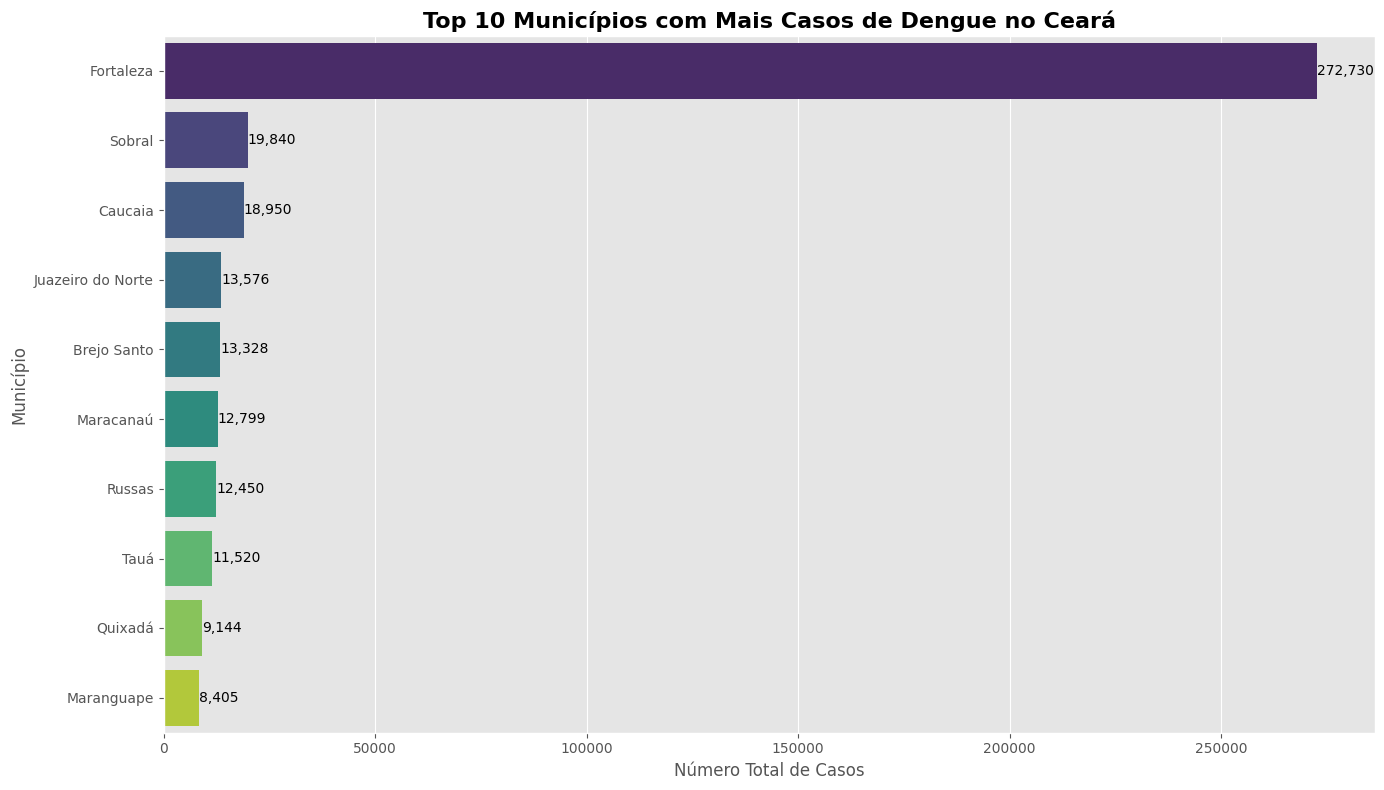

In [5]:
plt.style.use('ggplot')  # Usar um estilo mais moderno para os gráficos

# Agrupar os dados por município e somar os casos
df_municipio = df.groupby('municipio')['casos'].sum().reset_index()

# Ordenar os municípios pelo número de casos em ordem decrescente
df_municipio = df_municipio.sort_values(by='casos', ascending=False)

# Selecionar os 10 municípios com mais casos
top10_municipios = df_municipio.head(10)

# Criar o gráfico de barras horizontais com formatação aprimorada
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='casos', y='municipio', data=top10_municipios, palette='viridis')

# Adicionar os valores das barras no gráfico
for i, v in enumerate(top10_municipios['casos']):
    ax.text(v + 0.1, i, f'{int(v):,}', va='center')

# Melhorar o título e os rótulos dos eixos
plt.title('Top 10 Municípios com Mais Casos de Dengue no Ceará', fontsize=16, fontweight='bold')
plt.xlabel('Número Total de Casos', fontsize=12)
plt.ylabel('Município', fontsize=12)
plt.tight_layout()  # Ajustar o layout para evitar cortes
plt.show()

C:\Users\Windows\AppData\Local\Temp\ipykernel_16560\3732702969.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='casos', y='municipio', data=top10_municipios_media, palette='viridis')


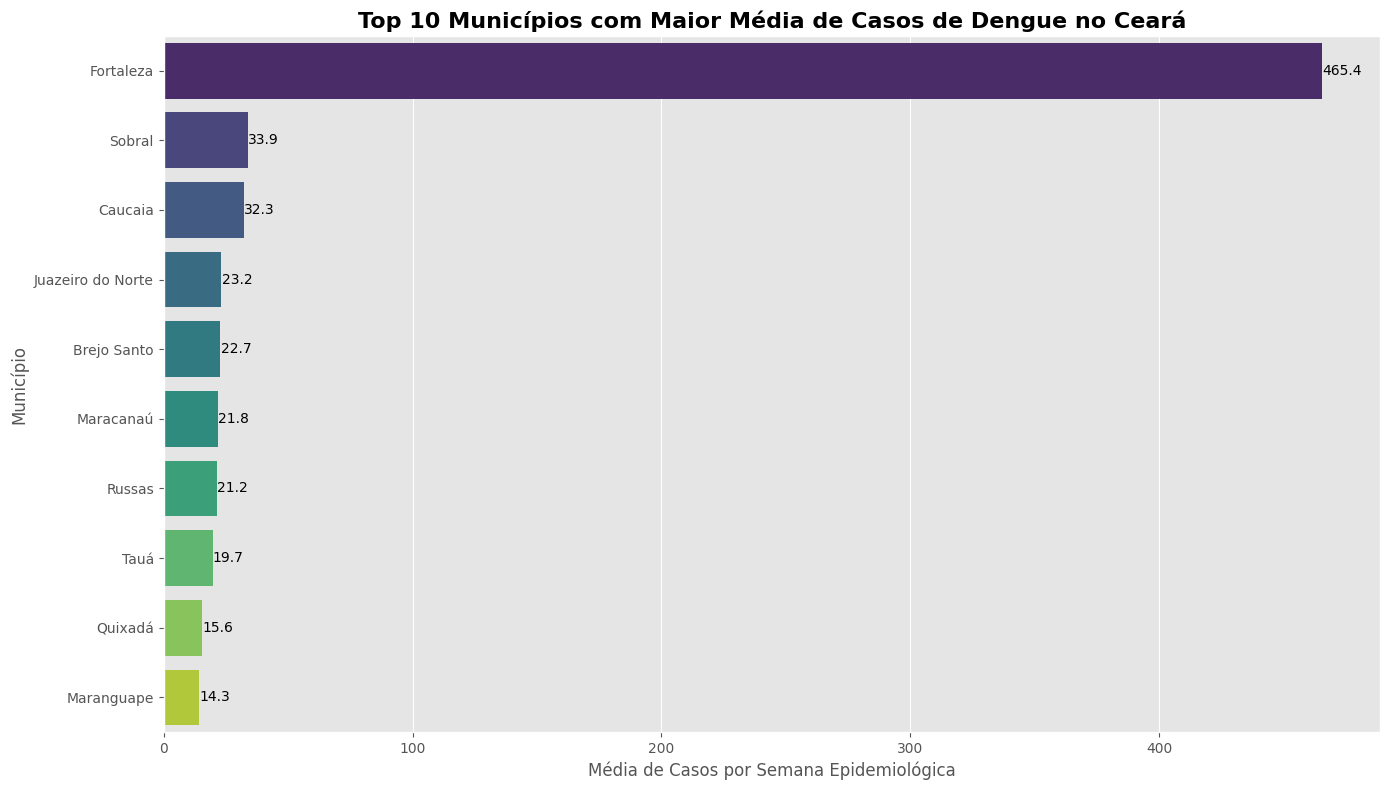

In [6]:
plt.style.use('ggplot')

# Agrupar os dados por município e calcular a média de casos
df_municipio_media = df.groupby('municipio')['casos'].mean().reset_index()
df_municipio_media['casos'] = df_municipio_media['casos']

# Ordenar os municípios pela média de casos em ordem decrescente
df_municipio_media = df_municipio_media.sort_values(by='casos', ascending=False)

# Selecionar os 10 municípios com maior média de casos
top10_municipios_media = df_municipio_media.head(10)

# Criar o gráfico de barras horizontais
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='casos', y='municipio', data=top10_municipios_media, palette='viridis')

# Adicionar os valores das barras no gráfico
for i, v in enumerate(top10_municipios_media['casos']):
    ax.text(v + 0.1, i, f'{v:.1f}', va='center')

# Melhorar o título e os rótulos dos eixos
plt.title('Top 10 Municípios com Maior Média de Casos de Dengue no Ceará', fontsize=16, fontweight='bold')
plt.xlabel('Média de Casos por Semana Epidemiológica', fontsize=12)
plt.ylabel('Município', fontsize=12)
plt.tight_layout()
plt.show()




C:\Users\Windows\AppData\Local\Temp\ipykernel_16560\3666200380.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='nome_mes', y='mean', data=media_mensal, palette='coolwarm', errorbar='sd')


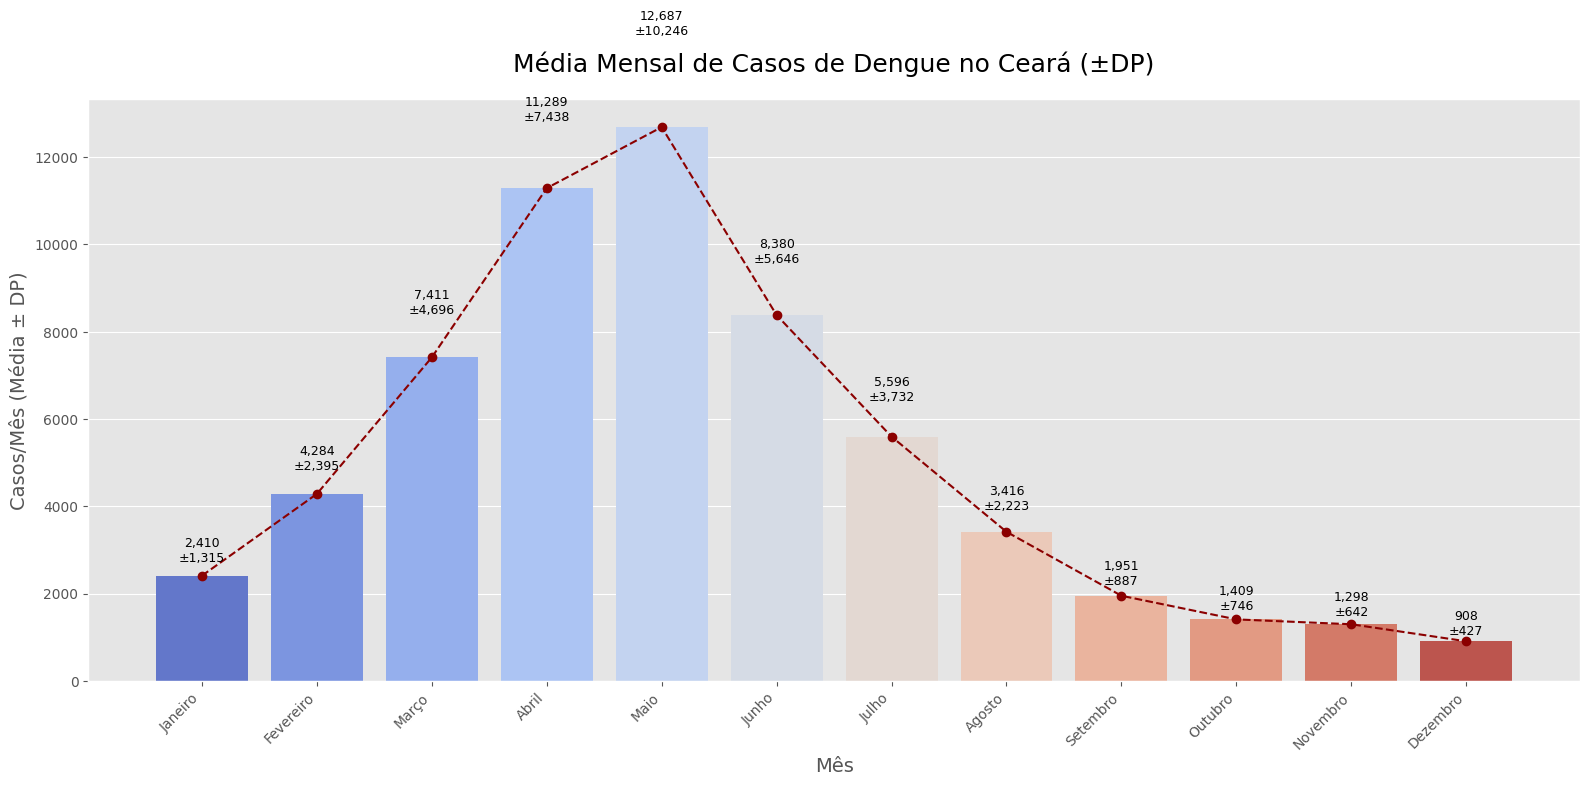

In [7]:
plt.style.use('ggplot')

# Criar um dicionário para mapear números de meses para nomes
meses = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 
         6: 'Junho', 7: 'Julho', 8: 'Agosto', 9: 'Setembro', 
         10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

# -----------------------------------------
# 1. ANÁLISE DE CASOS POR MÊS (APRIMORADA)
# -----------------------------------------
# Calcular métricas normalizadas
meses_analise = df.groupby(['mes', 'ano'])['casos'].sum().reset_index()
media_mensal = meses_analise.groupby('mes')['casos'].agg(['mean', 'std']).reset_index()
media_mensal['nome_mes'] = media_mensal['mes'].map(meses)

# Ordenar por mês para garantir a sequência correta
media_mensal = media_mensal.sort_values('mes')

# Gráfico de barras com tendência
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='nome_mes', y='mean', data=media_mensal, palette='coolwarm', errorbar='sd')
plt.plot(range(len(media_mensal)), media_mensal['mean'], color='darkred', marker='o', linestyle='--')

# Formatação aprimorada
plt.title('Média Mensal de Casos de Dengue no Ceará (±DP)', fontsize=18, pad=20)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Casos/Mês (Média ± DP)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Anotações personalizadas
for i, row in enumerate(media_mensal.itertuples()):
    ax.text(i, row.mean + max(15, row.std*0.2), f"{row.mean:,.0f}\n±{row.std:,.0f}", 
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



C:\Users\Windows\AppData\Local\Temp\ipykernel_16560\2588783565.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nome_mes', y='mean', data=media_mensal, palette='coolwarm', errorbar='sd', ax=ax)
C:\Users\Windows\AppData\Local\Temp\ipykernel_16560\2588783565.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\Windows\AppData\Local\Temp\ipykernel_16560\2588783565.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  inset_ax.set_xticklabels(['Agosto', 'Setembro'], fontsize=9)
C:\Users\Windows\AppData\Local\Temp\ipykernel_16560\2588783565.py:49: UserWarning: This figure includes Axes that are not

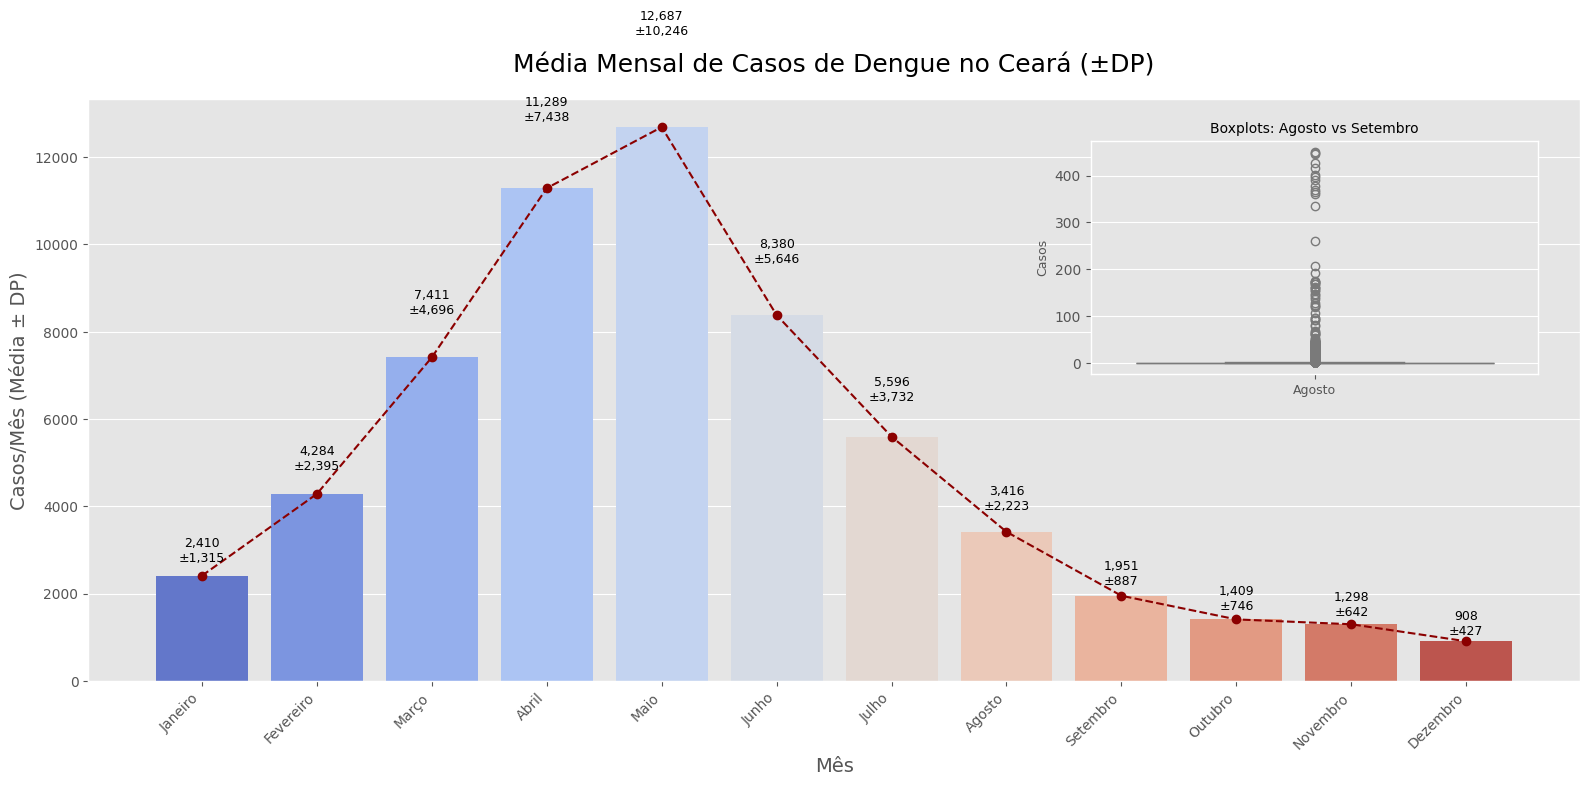

Colunas 'chuva' e/ou 'temperatura' não disponíveis no dataset.
Número de anos com dados para Agosto: 11
Número de anos com dados para Setembro: 11


In [8]:

plt.style.use('ggplot')

# Supondo que 'df' já esteja carregado e contenha as colunas: 'mes', 'ano', 'casos', e opcionalmente 'chuva' e 'temperatura'

# Criar um dicionário para mapear números de meses para nomes
meses_dict = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 
              6: 'Junho', 7: 'Julho', 8: 'Agosto', 9: 'Setembro', 
              10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

# -----------------------------------------
# 1. ANÁLISE DE CASOS POR MÊS (APRIMORADA)
# -----------------------------------------
# Calcular métricas normalizadas
meses_analise = df.groupby(['mes', 'ano'])['casos'].sum().reset_index()
media_mensal = meses_analise.groupby('mes')['casos'].agg(['mean', 'std']).reset_index()
media_mensal['nome_mes'] = media_mensal['mes'].map(meses_dict)
media_mensal = media_mensal.sort_values('mes')

# Criar a figura principal
fig, ax = plt.subplots(figsize=(16, 8))

# Gráfico de barras com tendência (Média ± DP)
sns.barplot(x='nome_mes', y='mean', data=media_mensal, palette='coolwarm', errorbar='sd', ax=ax)
ax.plot(range(len(media_mensal)), media_mensal['mean'], color='darkred', marker='o', linestyle='--')
ax.set_title('Média Mensal de Casos de Dengue no Ceará (±DP)', fontsize=18, pad=20)
ax.set_xlabel('Mês', fontsize=14)
ax.set_ylabel('Casos/Mês (Média ± DP)', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Anotações personalizadas
for i, row in enumerate(media_mensal.itertuples()):
    ax.text(i, row.mean + max(15, row.std*0.2), f"{row.mean:,.0f}\n±{row.std:,.0f}", 
            ha='center', va='bottom', fontsize=9)

# ---------------------------------------------------------
# Criar inset: Boxplots para Agosto (mes 8) e Setembro (mes 9)
# ---------------------------------------------------------
df_agosto = df[df['mes'] == 8]
df_setembro = df[df['mes'] == 9]

# Criar um inset no canto superior direito
inset_ax = inset_axes(ax, width="30%", height="40%", loc='upper right', borderpad=3)
box_data = [df_agosto['casos'], df_setembro['casos']]
sns.boxplot(data=box_data, palette='pastel', ax=inset_ax)
inset_ax.set_xticklabels(['Agosto', 'Setembro'], fontsize=9)
inset_ax.set_title('Boxplots: Agosto vs Setembro', fontsize=10)
inset_ax.set_ylabel('Casos', fontsize=9)

plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# 2. Análise de Variáveis Climáticas para Agosto e Setembro (impressão no console)
# ----------------------------------------------------------
if 'chuva' in df.columns and 'temperatura' in df.columns:
    correl_agosto_chuva = df_agosto['casos'].corr(df_agosto['chuva'])
    correl_agosto_temp = df_agosto['casos'].corr(df_agosto['temperatura'])
    correl_setembro_chuva = df_setembro['casos'].corr(df_setembro['chuva'])
    correl_setembro_temp = df_setembro['casos'].corr(df_setembro['temperatura'])
    
    print("Correlação entre casos e chuva em Agosto: {:.2f}".format(correl_agosto_chuva))
    print("Correlação entre casos e temperatura em Agosto: {:.2f}".format(correl_agosto_temp))
    print("Correlação entre casos e chuva em Setembro: {:.2f}".format(correl_setembro_chuva))
    print("Correlação entre casos e temperatura em Setembro: {:.2f}".format(correl_setembro_temp))
else:
    print("Colunas 'chuva' e/ou 'temperatura' não disponíveis no dataset.")

# ---------------------------------------------------------------------
# 3. Avaliar a Quantidade de Observações (anos) para Agosto e Setembro
# ---------------------------------------------------------------------
obs_agosto = df_agosto['ano'].nunique()
obs_setembro = df_setembro['ano'].nunique()

print(f"Número de anos com dados para Agosto: {obs_agosto}")
print(f"Número de anos com dados para Setembro: {obs_setembro}")


Os 4 meses com maior incidência de dengue:


,nome_mes,total_casos,media_casos_semanal,temp_media,estacao
4,Maio,139559,15.5,26.7,Outono
3,Abril,124174,14.4,26.7,Outono
5,Junho,92182,10.7,26.1,Inverno
2,Março,88937,9.3,26.5,Outono



Temperatura média nos meses de maior incidência: 26.5°C
Temperatura média nos outros meses: 26.2°C
Diferença: 0.3°C


C:\Users\Windows\AppData\Local\Temp\ipykernel_16560\3833365691.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(dados_mensais['nome_mes'], fontsize=8)
C:\Users\Windows\AppData\Local\Temp\ipykernel_16560\3833365691.py:136: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(dados_mensais['nome_mes'], fontsize=8)


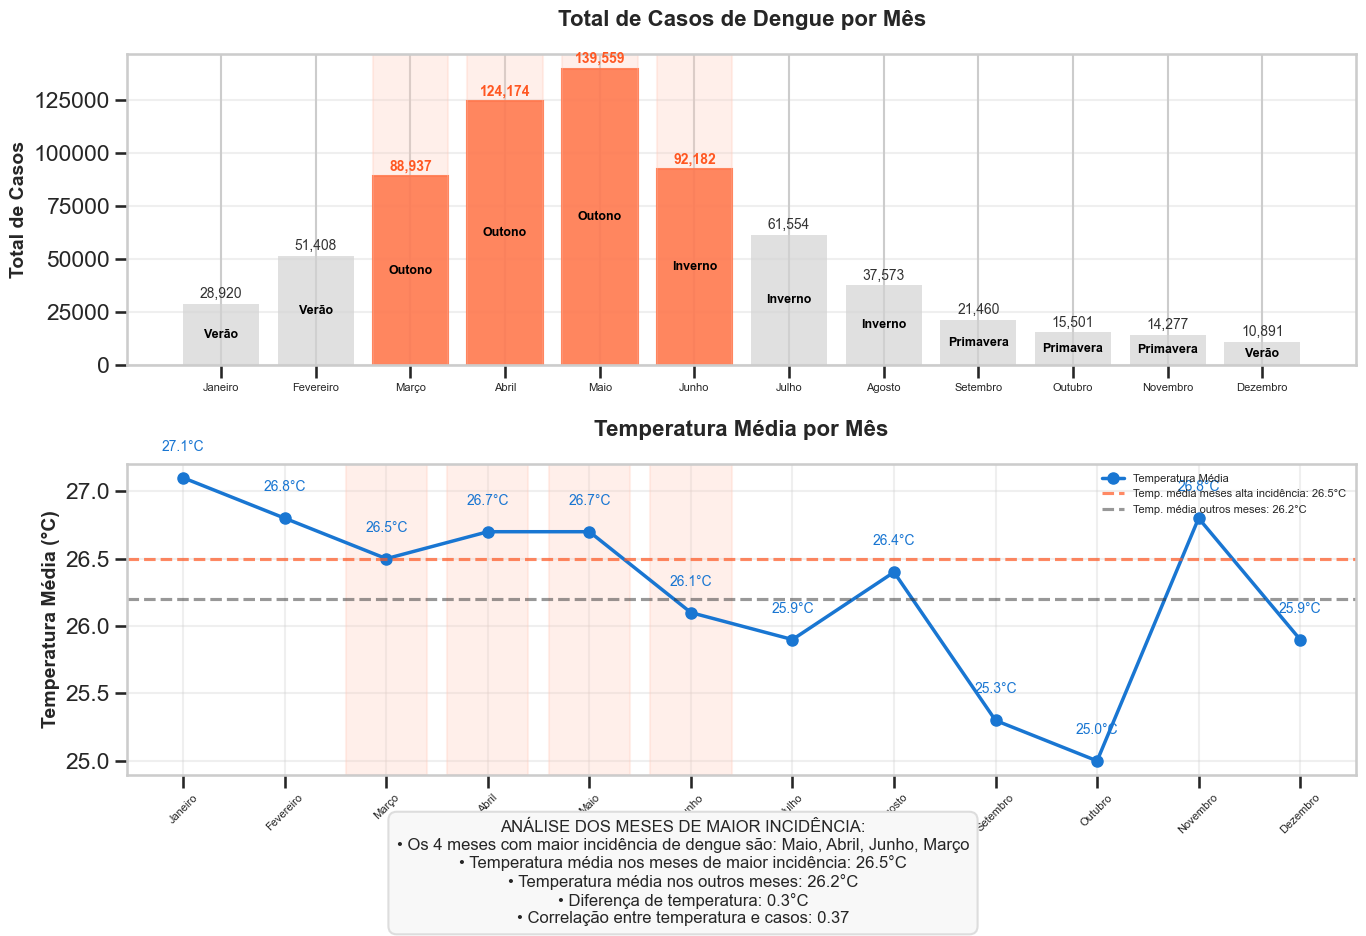

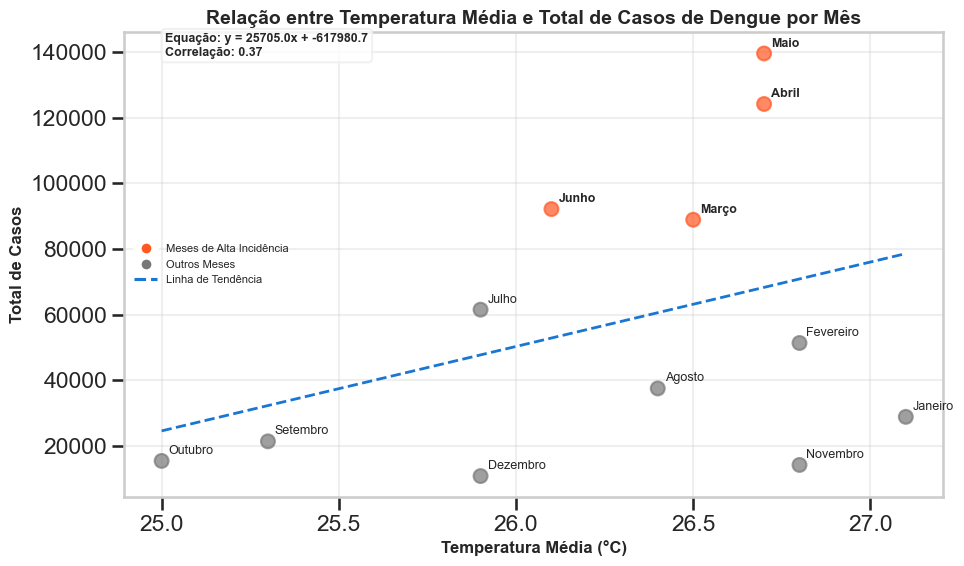

In [9]:
# -----------------------------------------
# 8. ANÁLISE DOS MESES COM MAIOR INCIDÊNCIA DE DENGUE E SUAS TEMPERATURAS
# -----------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configurar estilo para visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk")

# Agrupar dados por mês para calcular incidência e temperatura média
dados_mensais = df.groupby('mes').agg({
    'casos': ['sum', 'mean'],
    'tempmed': 'mean'
}).reset_index()

# Renomear colunas
dados_mensais.columns = ['mes', 'total_casos', 'media_casos_semanal', 'temp_media']
dados_mensais = dados_mensais.round(1)

# Adicionar nomes dos meses
meses_nomes = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}
dados_mensais['nome_mes'] = dados_mensais['mes'].map(meses_nomes)

# Adicionar estação do ano
dados_mensais['estacao'] = dados_mensais['mes'].apply(definir_estacao)

# Ordenar por total de casos (decrescente) para identificar os meses mais incidentes
dados_mensais_ordenados = dados_mensais.sort_values('total_casos', ascending=False)

# Identificar os 4 meses com maior incidência
top_meses = dados_mensais_ordenados.head(4)
print("Os 4 meses com maior incidência de dengue:")
display(top_meses[['nome_mes', 'total_casos', 'media_casos_semanal', 'temp_media', 'estacao']])

# Calcular temperatura média dos meses de maior incidência
temp_media_alta_incidencia = top_meses['temp_media'].mean().round(1)
print(f"\nTemperatura média nos meses de maior incidência: {temp_media_alta_incidencia}°C")

# Calcular temperatura média dos outros meses
outros_meses = dados_mensais[~dados_mensais['mes'].isin(top_meses['mes'])]
temp_media_baixa_incidencia = outros_meses['temp_media'].mean().round(1)
print(f"Temperatura média nos outros meses: {temp_media_baixa_incidencia}°C")
print(f"Diferença: {(temp_media_alta_incidencia - temp_media_baixa_incidencia).round(1)}°C")

# Ordenar por mês para visualização cronológica
dados_mensais = dados_mensais.sort_values('mes')

# Definir cores para as estações
cores_estacoes = {
    'Verão': '#FF9933',     # Laranja
    'Outono': '#D2691E',    # Marrom
    'Inverno': '#6495ED',   # Azul
    'Primavera': '#7CFC00'  # Verde
}

# Criar figura para visualização
plt.figure(figsize=(14, 10), dpi=100, facecolor='white')

# Criar subplot para casos
ax1 = plt.subplot(2, 1, 1)

# Criar barras para casos
barras = ax1.bar(dados_mensais['nome_mes'], dados_mensais['total_casos'], 
               alpha=0.7, color='lightgray')

# Destacar os meses de maior incidência
for i, mes in enumerate(dados_mensais['nome_mes']):
    if mes in top_meses['nome_mes'].values:
        barras[i].set_color('#FF5722')
        barras[i].set_alpha(0.9)

# Adicionar rótulos para os valores
for i, row in dados_mensais.iterrows():
    ax1.text(i, row['total_casos'] + max(dados_mensais['total_casos'])*0.02, 
            f"{int(row['total_casos']):,}", ha='center', fontsize=10, 
            color='#333333' if row['nome_mes'] not in top_meses['nome_mes'].values else '#FF5722',
            fontweight='bold' if row['nome_mes'] in top_meses['nome_mes'].values else 'normal')
    
    # Adicionar nome da estação dentro da barra
    ax1.text(i, row['total_casos']/2, row['estacao'], 
            ha='center', va='center', fontsize=9, color='black', fontweight='bold')

# Configurar eixos e título
ax1.set_title('Total de Casos de Dengue por Mês', fontsize=16, fontweight='bold', pad=20)
ax1.set_ylabel('Total de Casos', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Reduzir o tamanho da fonte dos meses no eixo x
ax1.set_xticklabels(dados_mensais['nome_mes'], fontsize=8)

# Destacar área dos meses de maior incidência
for i, mes in enumerate(dados_mensais['nome_mes']):
    if mes in top_meses['nome_mes'].values:
        ax1.axvspan(i-0.4, i+0.4, color='#FFCCBC', alpha=0.3)

# Criar subplot para temperatura
ax2 = plt.subplot(2, 1, 2)

# Criar linha para temperatura
ax2.plot(dados_mensais['nome_mes'], dados_mensais['temp_media'], 
        marker='o', markersize=8, linewidth=2.5, color='#1976D2', 
        label='Temperatura Média')

# Adicionar rótulos para os valores
for i, row in dados_mensais.iterrows():
    ax2.text(i, row['temp_media'] + 0.2, f"{row['temp_media']}°C", 
            ha='center', fontsize=10, color='#1976D2')

# Adicionar linha horizontal para temperatura média dos meses de alta incidência
ax2.axhline(y=temp_media_alta_incidencia, color='#FF5722', linestyle='--', alpha=0.7,
           label=f'Temp. média meses alta incidência: {temp_media_alta_incidencia}°C')

# Adicionar linha horizontal para temperatura média dos outros meses
ax2.axhline(y=temp_media_baixa_incidencia, color='#333333', linestyle='--', alpha=0.5,
           label=f'Temp. média outros meses: {temp_media_baixa_incidencia}°C')

# Destacar área dos meses de maior incidência
for i, mes in enumerate(dados_mensais['nome_mes']):
    if mes in top_meses['nome_mes'].values:
        ax2.axvspan(i-0.4, i+0.4, color='#FFCCBC', alpha=0.3)

# Configurar eixos e título
ax2.set_title('Temperatura Média por Mês', fontsize=16, fontweight='bold', pad=20)
ax2.set_ylabel('Temperatura Média (°C)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Mês', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Reduzir o tamanho da fonte dos meses no eixo x
ax2.set_xticklabels(dados_mensais['nome_mes'], fontsize=8)

# Reduzir o tamanho da legenda
ax2.legend(fontsize=8, loc='upper right', framealpha=0.7)

# Adicionar texto informativo
info_text = (
    f"ANÁLISE DOS MESES DE MAIOR INCIDÊNCIA:\n"
    f"• Os 4 meses com maior incidência de dengue são: {', '.join(top_meses['nome_mes'].tolist())}\n"
    f"• Temperatura média nos meses de maior incidência: {temp_media_alta_incidencia}°C\n"
    f"• Temperatura média nos outros meses: {temp_media_baixa_incidencia}°C\n"
    f"• Diferença de temperatura: {(temp_media_alta_incidencia - temp_media_baixa_incidencia).round(1)}°C\n"
    f"• Correlação entre temperatura e casos: {dados_mensais['temp_media'].corr(dados_mensais['total_casos']).round(2)}"
)

plt.figtext(0.5, 0.01, info_text, fontsize=12, ha='center', 
           bbox=dict(boxstyle="round,pad=0.5", facecolor='#F8F8F8', edgecolor='#DDDDDD'))

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.xticks(rotation=45)
plt.show()

# Criar gráfico de dispersão para visualizar correlação entre temperatura e casos
plt.figure(figsize=(10, 6), dpi=100, facecolor='white')

# Criar scatter plot
scatter = plt.scatter(dados_mensais['temp_media'], dados_mensais['total_casos'], 
                    s=100, alpha=0.7, 
                    c=dados_mensais['mes'].isin(top_meses['mes']).map({True: '#FF5722', False: '#777777'}))

# Adicionar rótulos para cada ponto
for i, row in dados_mensais.iterrows():
    plt.annotate(row['nome_mes'], 
                xy=(row['temp_media'], row['total_casos']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, fontweight='bold' if row['nome_mes'] in top_meses['nome_mes'].values else 'normal')

# Adicionar linha de tendência
z = np.polyfit(dados_mensais['temp_media'], dados_mensais['total_casos'], 1)
p = np.poly1d(z)
plt.plot(sorted(dados_mensais['temp_media']), p(sorted(dados_mensais['temp_media'])), 
        linestyle='--', color='#1976D2', linewidth=2)

# Configurar eixos e título
plt.title('Relação entre Temperatura Média e Total de Casos de Dengue por Mês', 
         fontsize=14, fontweight='bold')
plt.xlabel('Temperatura Média (°C)', fontsize=12, fontweight='bold')
plt.ylabel('Total de Casos', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# Adicionar legenda com tamanho reduzido
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF5722', markersize=8, label='Meses de Alta Incidência'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#777777', markersize=8, label='Outros Meses'),
    Line2D([0], [0], color='#1976D2', linestyle='--', label='Linha de Tendência')
]
plt.legend(handles=legend_elements, loc='best', fontsize=8, framealpha=0.7)

# Adicionar equação da linha de tendência e correlação
correlacao = dados_mensais['temp_media'].corr(dados_mensais['total_casos']).round(2)
equation = f'y = {z[0]:.1f}x + {z[1]:.1f}'
plt.annotate(f'Equação: {equation}\nCorrelação: {correlacao}', 
            xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=9, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

C:\Users\Windows\AppData\Local\Temp\ipykernel_16560\2689585663.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.08, 1, 0.98])


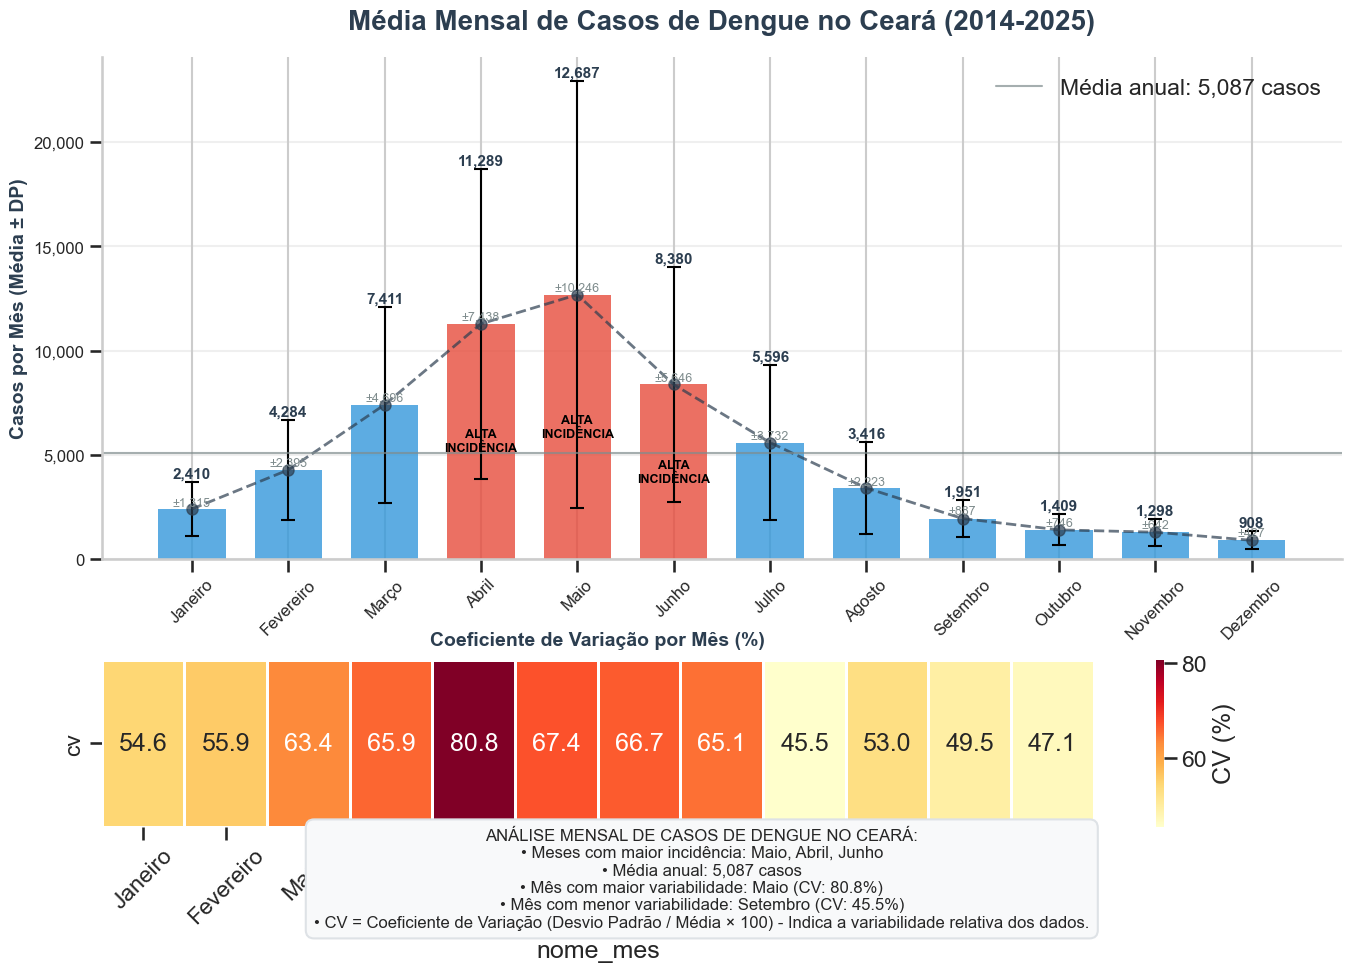

Estatísticas detalhadas por mês:


,Mês,Média de Casos,Desvio Padrão,Mediana,CV (%),Anos Analisados
0,Janeiro,2410.0,1315.0,2078.0,54.6,12
1,Fevereiro,4284.0,2394.9,4325.0,55.9,12
2,Março,7411.4,4696.4,6942.0,63.4,12
3,Abril,11288.5,7438.2,7609.0,65.9,11
4,Maio,12687.2,10246.0,6637.0,80.8,11
5,Junho,8380.2,5646.1,5454.0,67.4,11
6,Julho,5595.8,3732.3,3772.0,66.7,11
7,Agosto,3415.7,2223.2,2785.0,65.1,11
8,Setembro,1950.9,887.3,1712.0,45.5,11
9,Outubro,1409.2,746.2,1243.0,53.0,11


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter

# Configurar estilo visual mais profissional
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans']

# Criar um dicionário para mapear números de meses para nomes
meses = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 
         6: 'Junho', 7: 'Julho', 8: 'Agosto', 9: 'Setembro', 
         10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

# -----------------------------------------
# 1. ANÁLISE DE CASOS POR MÊS (APRIMORADA)
# -----------------------------------------
# Calcular métricas normalizadas
meses_analise = df.groupby(['mes', 'ano'])['casos'].sum().reset_index()
media_mensal = meses_analise.groupby('mes')['casos'].agg(['mean', 'std', 'median', 'count']).reset_index()
media_mensal['nome_mes'] = media_mensal['mes'].map(meses)
media_mensal['cv'] = (media_mensal['std'] / media_mensal['mean'] * 100).round(1)  # Coeficiente de variação

# Ordenar por mês para garantir a sequência correta
media_mensal = media_mensal.sort_values('mes')

# Identificar os meses com maior incidência
top_meses = media_mensal.nlargest(3, 'mean')

# Criar figura com tamanho adequado e resolução alta
plt.figure(figsize=(16, 10), dpi=100, facecolor='white')

# Criar um layout com dois subplots
gs = plt.GridSpec(2, 1, height_ratios=[3, 1], hspace=0.3)

# Subplot principal: gráfico de barras com tendência
ax1 = plt.subplot(gs[0])

# Definir cores personalizadas para destacar os meses de maior incidência
cores = ['#3498db' if i not in top_meses.index else '#e74c3c' for i in range(len(media_mensal))]

# Criar barras com cores personalizadas
barras = ax1.bar(media_mensal['nome_mes'], media_mensal['mean'], 
               color=cores, alpha=0.8, width=0.7, 
               yerr=media_mensal['std'], capsize=5, 
               error_kw={'ecolor': 'black', 'elinewidth': 1.5, 'capthick': 1.5})

# Adicionar linha de tendência com marcadores
ax1.plot(media_mensal['nome_mes'], media_mensal['mean'], 
       color='#2c3e50', marker='o', markersize=8, 
       linestyle='--', linewidth=2, alpha=0.7)

# Adicionar linha horizontal para média anual
media_anual = media_mensal['mean'].mean()
ax1.axhline(y=media_anual, color='#7f8c8d', linestyle='-', 
          linewidth=1.5, alpha=0.7, 
          label=f'Média anual: {media_anual:,.0f} casos')

# Formatação aprimorada do eixo Y com separador de milhares
def format_thousands(x, pos):
    return f'{x:,.0f}'

ax1.yaxis.set_major_formatter(FuncFormatter(format_thousands))

# Anotações personalizadas para cada barra
for i, row in enumerate(media_mensal.itertuples()):
    # Texto para média e desvio padrão
    ax1.text(i, row.mean + row.std + 50, f"{row.mean:,.0f}", 
            ha='center', va='bottom', fontsize=11, 
            fontweight='bold', color='#2c3e50')
    
    ax1.text(i, row.mean + 50, f"±{row.std:,.0f}", 
            ha='center', va='bottom', fontsize=9, 
            color='#7f8c8d')
    
    # Destacar os meses de maior incidência
    if i in top_meses.index:
        ax1.text(i, row.mean/2, "ALTA\nINCIDÊNCIA", 
                ha='center', va='center', fontsize=9, 
                color='black', fontweight='bold')

# Formatação aprimorada
ax1.set_title('Média Mensal de Casos de Dengue no Ceará (2014-2025)', 
             fontsize=20, pad=20, fontweight='bold', color='#2c3e50')
ax1.set_xlabel('')  # Remover label do eixo X pois é redundante
ax1.set_ylabel('Casos por Mês (Média ± DP)', fontsize=14, fontweight='bold', color='#2c3e50')
ax1.tick_params(axis='x', rotation=45, labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.grid(axis='y', alpha=0.3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend(loc='upper right')

# Subplot inferior: heatmap do coeficiente de variação
ax2 = plt.subplot(gs[1])

# Criar dados para o heatmap
cv_data = media_mensal[['nome_mes', 'cv']].set_index('nome_mes').T

# Criar heatmap
sns.heatmap(cv_data, annot=True, cmap='YlOrRd', fmt='.1f', 
           linewidths=1, ax=ax2, cbar_kws={'label': 'CV (%)'})

ax2.set_title('Coeficiente de Variação por Mês (%)', 
             fontsize=14, pad=10, fontweight='bold', color='#2c3e50')
ax2.set_ylabel('')
ax2.tick_params(axis='x', rotation=45)

# Adicionar texto explicativo
info_text = (
    "ANÁLISE MENSAL DE CASOS DE DENGUE NO CEARÁ:\n"
    f"• Meses com maior incidência: {', '.join(top_meses['nome_mes'].tolist())}\n"
    f"• Média anual: {media_anual:,.0f} casos\n"
    f"• Mês com maior variabilidade: {media_mensal.loc[media_mensal['cv'].idxmax(), 'nome_mes']} (CV: {media_mensal['cv'].max():.1f}%)\n"
    f"• Mês com menor variabilidade: {media_mensal.loc[media_mensal['cv'].idxmin(), 'nome_mes']} (CV: {media_mensal['cv'].min():.1f}%)\n"
    "• CV = Coeficiente de Variação (Desvio Padrão / Média × 100) - Indica a variabilidade relativa dos dados."
)

plt.figtext(0.5, 0.01, info_text, fontsize=12, ha='center', 
           bbox=dict(boxstyle="round,pad=0.5", facecolor='#f8f9fa', edgecolor='#dee2e6'))

plt.tight_layout(rect=[0, 0.08, 1, 0.98])
plt.show()

# Exibir tabela com estatísticas detalhadas
tabela_estatisticas = media_mensal[['nome_mes', 'mean', 'std', 'median', 'cv', 'count']]
tabela_estatisticas.columns = ['Mês', 'Média de Casos', 'Desvio Padrão', 'Mediana', 'CV (%)', 'Anos Analisados']
tabela_estatisticas = tabela_estatisticas.round(1)

print("Estatísticas detalhadas por mês:")
display(tabela_estatisticas)

Columns in DataFrame: ['data_iniSE', 'SE', 'casos_est', 'casos_est_min', 'casos_est_max', 'casos', 'p_rt1', 'p_inc100k', 'Localidade_id', 'nivel', 'id', 'versao_modelo', 'tweet', 'Rt', 'pop', 'tempmin', 'umidmax', 'receptivo', 'transmissao', 'nivel_inc', 'umidmed', 'umidmin', 'tempmed', 'tempmax', 'casprov', 'casprov_est', 'casprov_est_min', 'casprov_est_max', 'casconf', 'notif_accum_year', 'municipio', 'mes', 'ano', 'estacao']
Usando a coluna 'ano' para o ano


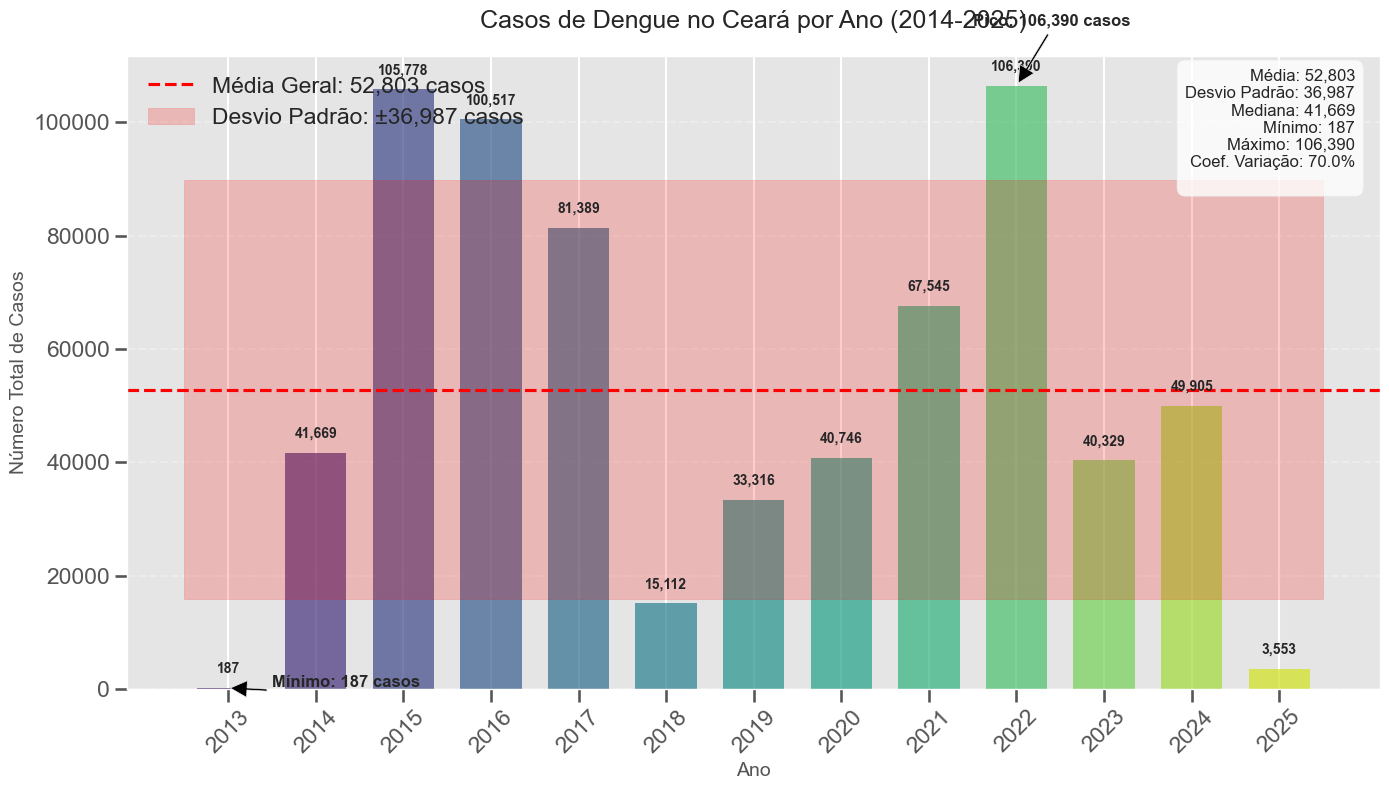

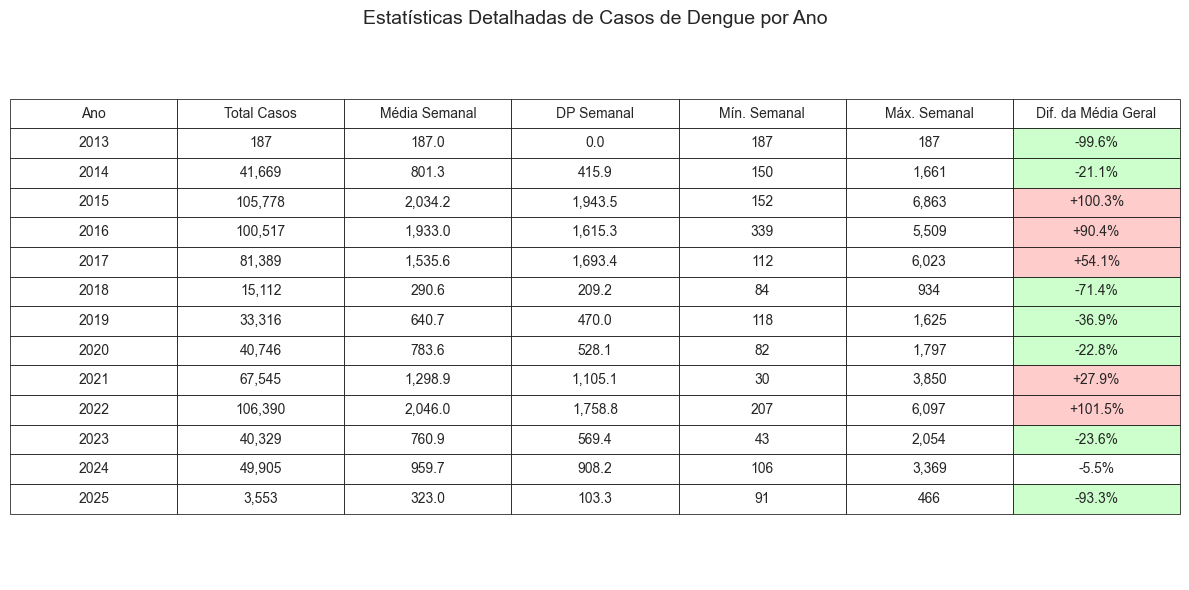

In [11]:
# First, let's check the column names in your DataFrame
print("Columns in DataFrame:", df.columns.tolist())

# Importar bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Carregar os dados
df = pd.read_csv("dengue_ce_municipios_2014_2025.csv")

# Configurar o estilo do gráfico
plt.style.use('ggplot')
sns.set_palette("viridis")

# Agrupar dados por ano e calcular a soma de casos
# Usando a coluna correta para o ano (verificando se é 'ey' ou 'ano')
if 'ey' in df.columns:
    ano_column = 'ey'
elif 'ano' in df.columns:
    ano_column = 'ano'
else:
    # Se não encontrar nenhuma das colunas, vamos tentar extrair o ano da data
    if 'data_iniSE' in df.columns:
        df['ano'] = pd.to_datetime(df['data_iniSE']).dt.year
        ano_column = 'ano'
    else:
        raise ValueError("Não foi possível encontrar uma coluna de ano no DataFrame")

print(f"Usando a coluna '{ano_column}' para o ano")

# Agrupar por ano
casos_anuais = df.groupby(ano_column)['casos'].sum().reset_index()
casos_anuais.rename(columns={ano_column: 'ano'}, inplace=True)

# Calcular média e desvio padrão geral
media_geral = casos_anuais['casos'].mean()
desvio_padrao_geral = casos_anuais['casos'].std()

# Criar figura
plt.figure(figsize=(14, 8))

# Criar barras para cada ano
bars = plt.bar(casos_anuais['ano'], casos_anuais['casos'], 
        color=sns.color_palette("viridis", len(casos_anuais)),
        alpha=0.7, width=0.7)

# Adicionar linha horizontal para a média geral
plt.axhline(y=media_geral, color='red', linestyle='--', 
           label=f'Média Geral: {media_geral:,.0f} casos')

# Adicionar área sombreada para o desvio padrão
plt.fill_between(
    [casos_anuais['ano'].min()-0.5, casos_anuais['ano'].max()+0.5], 
    media_geral - desvio_padrao_geral, 
    media_geral + desvio_padrao_geral, 
    color='red', alpha=0.2, 
    label=f'Desvio Padrão: ±{desvio_padrao_geral:,.0f} casos'
)

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02*max(casos_anuais['casos']),
            f'{height:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adicionar rótulos e título
plt.title('Casos de Dengue no Ceará por Ano (2014-2025)', fontsize=18, pad=20)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Número Total de Casos', fontsize=14)
plt.xticks(casos_anuais['ano'], rotation=45)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Adicionar anotações para anos com valores extremos
ano_max = casos_anuais.loc[casos_anuais['casos'].idxmax()]
ano_min = casos_anuais.loc[casos_anuais['casos'].idxmin()]

plt.annotate(f'Pico: {ano_max["casos"]:,.0f} casos',
            xy=(ano_max['ano'], ano_max['casos']),
            xytext=(ano_max['ano']-0.5, ano_max['casos']*1.1),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
            fontsize=12, fontweight='bold')

plt.annotate(f'Mínimo: {ano_min["casos"]:,.0f} casos',
            xy=(ano_min['ano'], ano_min['casos']),
            xytext=(ano_min['ano']+0.5, ano_min['casos']*1.5),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
            fontsize=12, fontweight='bold')

# Adicionar tabela com estatísticas
stats_table = pd.DataFrame({
    'Estatística': ['Média', 'Desvio Padrão', 'Mediana', 'Mínimo', 'Máximo', 'Coef. Variação'],
    'Valor': [
        f"{media_geral:,.0f}",
        f"{desvio_padrao_geral:,.0f}",
        f"{casos_anuais['casos'].median():,.0f}",
        f"{casos_anuais['casos'].min():,.0f}",
        f"{casos_anuais['casos'].max():,.0f}",
        f"{(desvio_padrao_geral/media_geral*100):,.1f}%"
    ]
})

# Adicionar a tabela como texto no canto superior direito
table_text = ""
for _, row in stats_table.iterrows():
    table_text += f"{row['Estatística']}: {row['Valor']}\n"

plt.text(0.98, 0.98, table_text,
        transform=plt.gca().transAxes,
        fontsize=12,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

# Adicionar legenda
plt.legend(loc='upper left')

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# Criar uma tabela detalhada com estatísticas por ano
plt.figure(figsize=(12, 6))
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

# Calcular estatísticas adicionais por ano
stats_anuais = []
for ano in sorted(casos_anuais['ano'].unique()):
    # Filtrar dados para este ano
    dados_ano = df[df[ano_column] == ano]
    casos_ano = dados_ano['casos'].sum()
    
    # Calcular estatísticas mensais para este ano
    # Verificar se temos a coluna 'SE' (semana epidemiológica)
    if 'SE' in df.columns:
        dados_mensais = dados_ano.groupby('SE')['casos'].sum()
    elif 'mes' in df.columns:
        dados_mensais = dados_ano.groupby('mes')['casos'].sum()
    else:
        # Se não tiver coluna de período, criar uma série com o total
        dados_mensais = pd.Series([casos_ano])
    
    media_mensal = dados_mensais.mean()
    desvio_mensal = dados_mensais.std() if len(dados_mensais) > 1 else 0
    max_mensal = dados_mensais.max()
    min_mensal = dados_mensais.min()
    
    # Calcular diferença percentual em relação à média geral
    diff_percent = ((casos_ano - media_geral) / media_geral) * 100
    
    stats_anuais.append([
        ano,
        f"{casos_ano:,.0f}",
        f"{media_mensal:,.1f}",
        f"{desvio_mensal:,.1f}",
        f"{min_mensal:,.0f}",
        f"{max_mensal:,.0f}",
        f"{diff_percent:+.1f}%"
    ])

# Criar tabela
colunas = ['Ano', 'Total Casos', 'Média Semanal', 'DP Semanal', 'Mín. Semanal', 'Máx. Semanal', 'Dif. da Média Geral']
tabela = plt.table(cellText=stats_anuais, colLabels=colunas, loc='center', cellLoc='center')
tabela.auto_set_font_size(False)
tabela.set_fontsize(10)
tabela.scale(1, 1.5)

# Colorir células baseado na diferença percentual
for i, row in enumerate(stats_anuais):
    diff = float(row[6].replace('+', '').replace('%', ''))
    if diff > 20:
        tabela[(i+1, 6)].set_facecolor('#ffcccc')  # Vermelho claro para valores muito acima
    elif diff < -20:
        tabela[(i+1, 6)].set_facecolor('#ccffcc')  # Verde claro para valores muito abaixo

plt.title('Estatísticas Detalhadas de Casos de Dengue por Ano', fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\Windows\AppData\Local\Temp\ipykernel_16560\4129125744.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='nome_mes', y='casos', data=meses_analise, order=order,


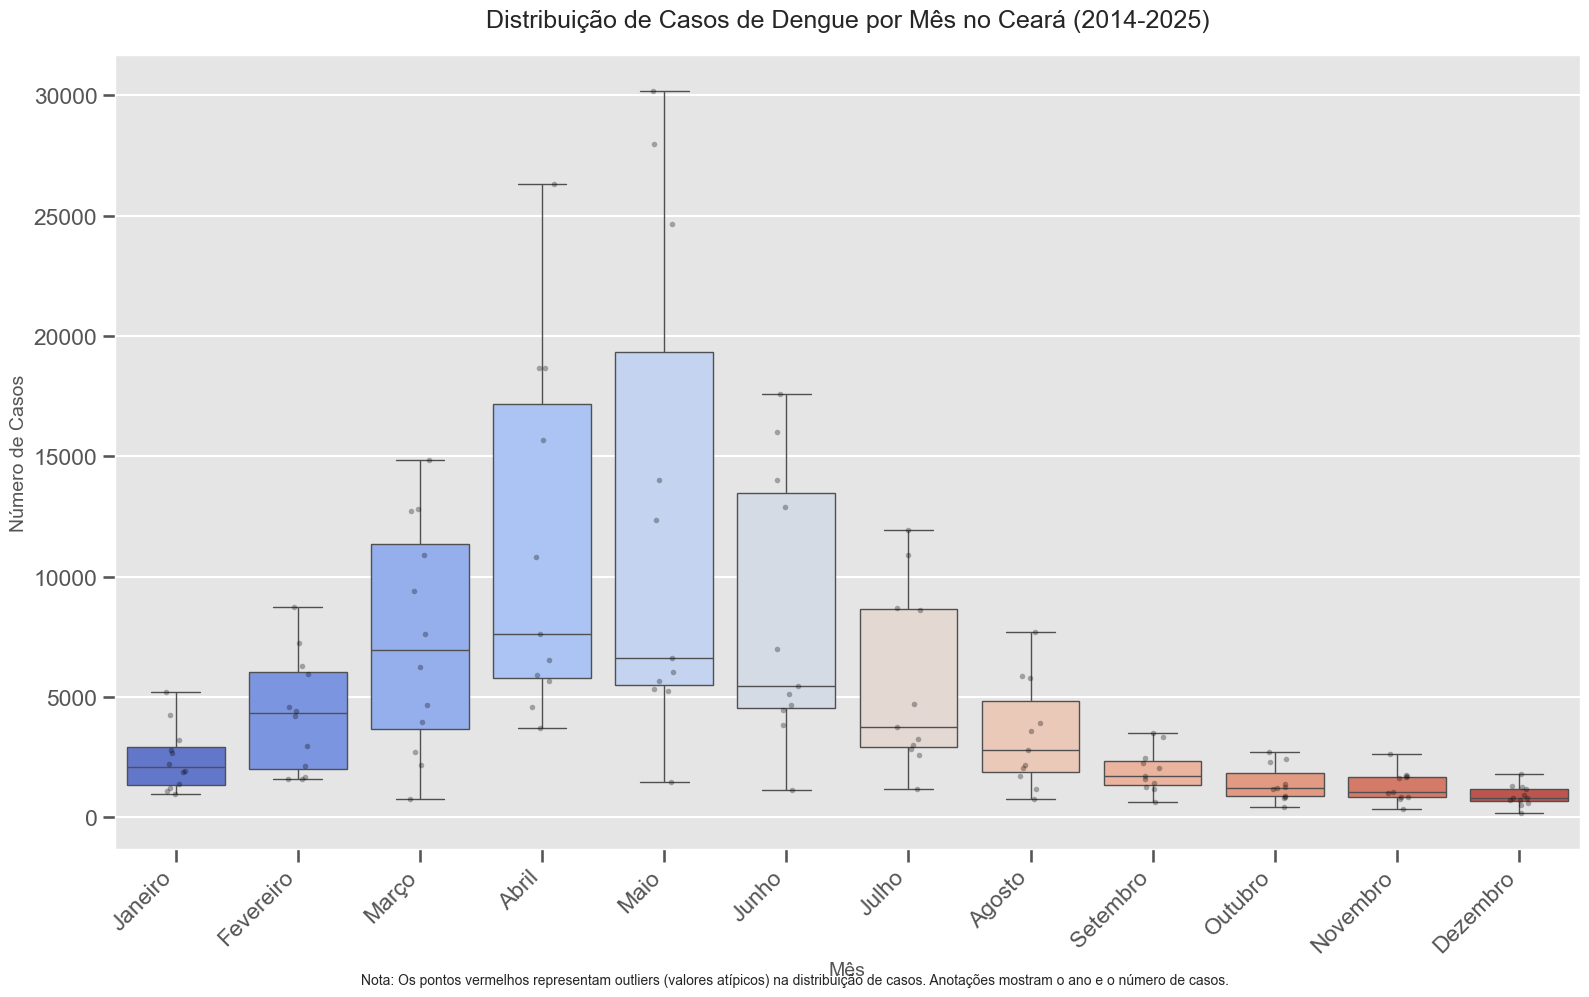

C:\Users\Windows\AppData\Local\Temp\ipykernel_16560\4129125744.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='nome_mes', y='casos', data=meses_analise, order=order,


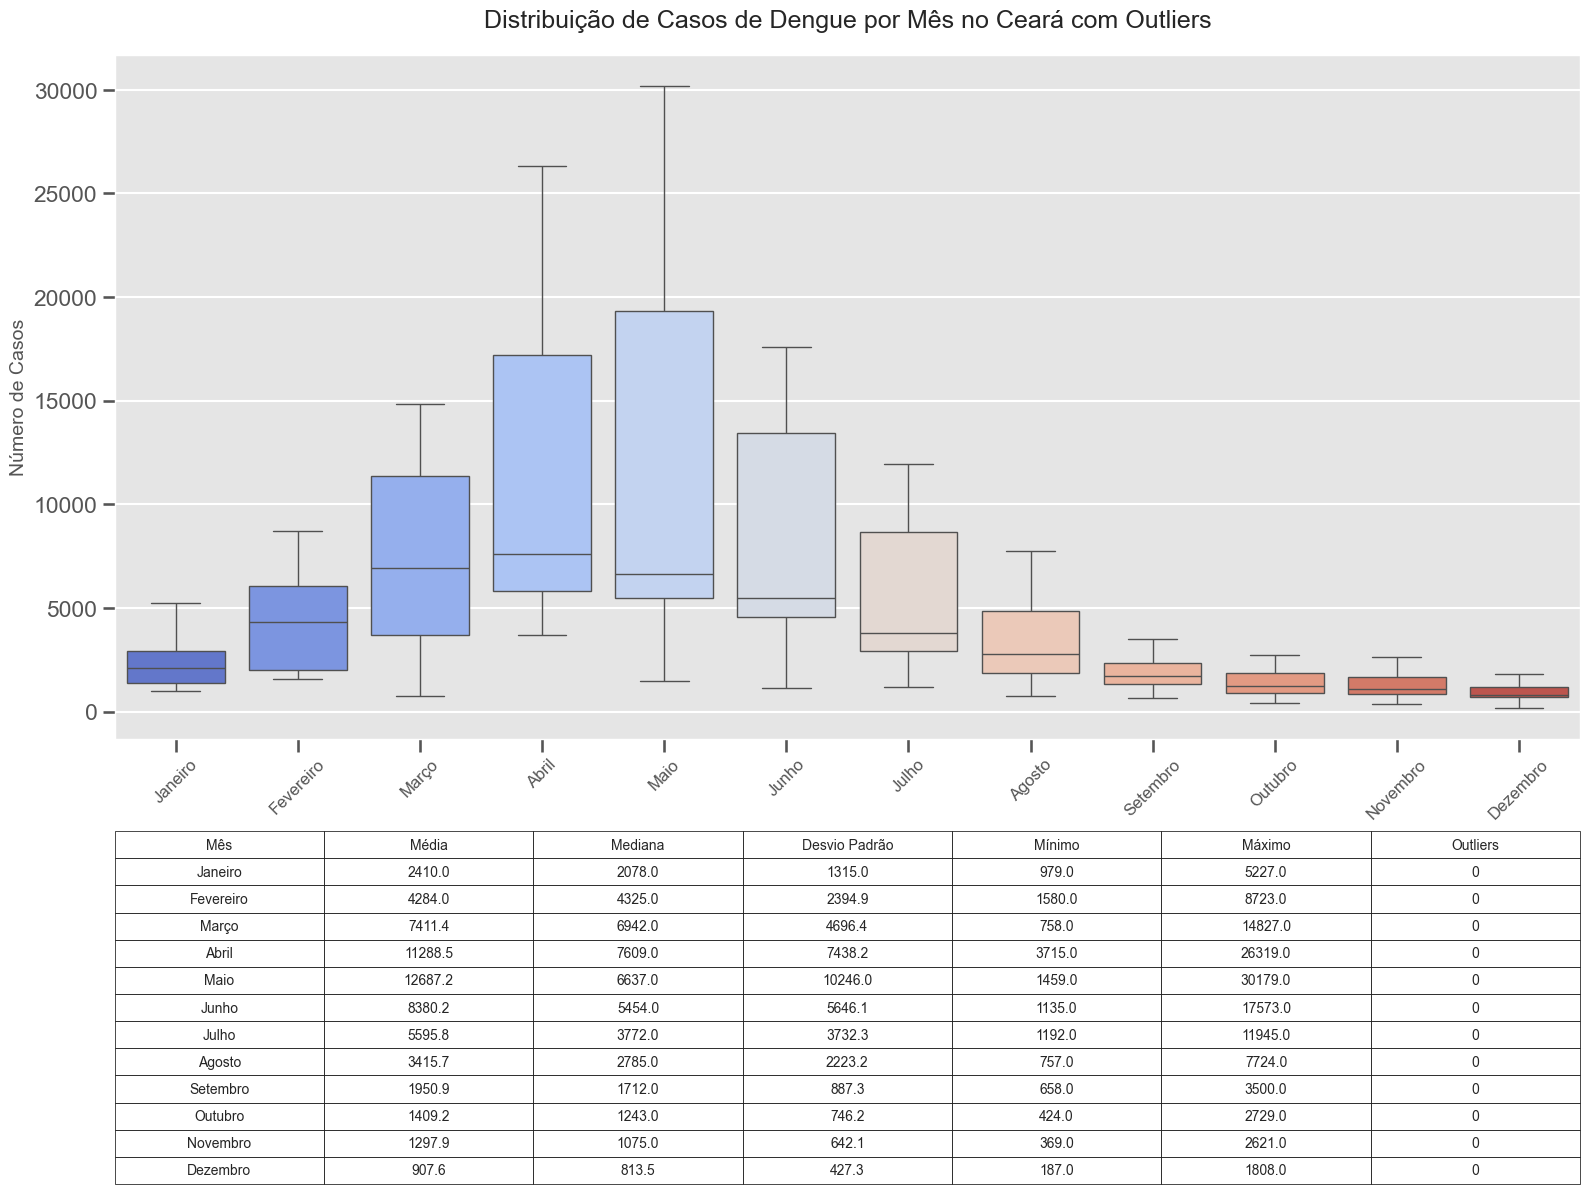

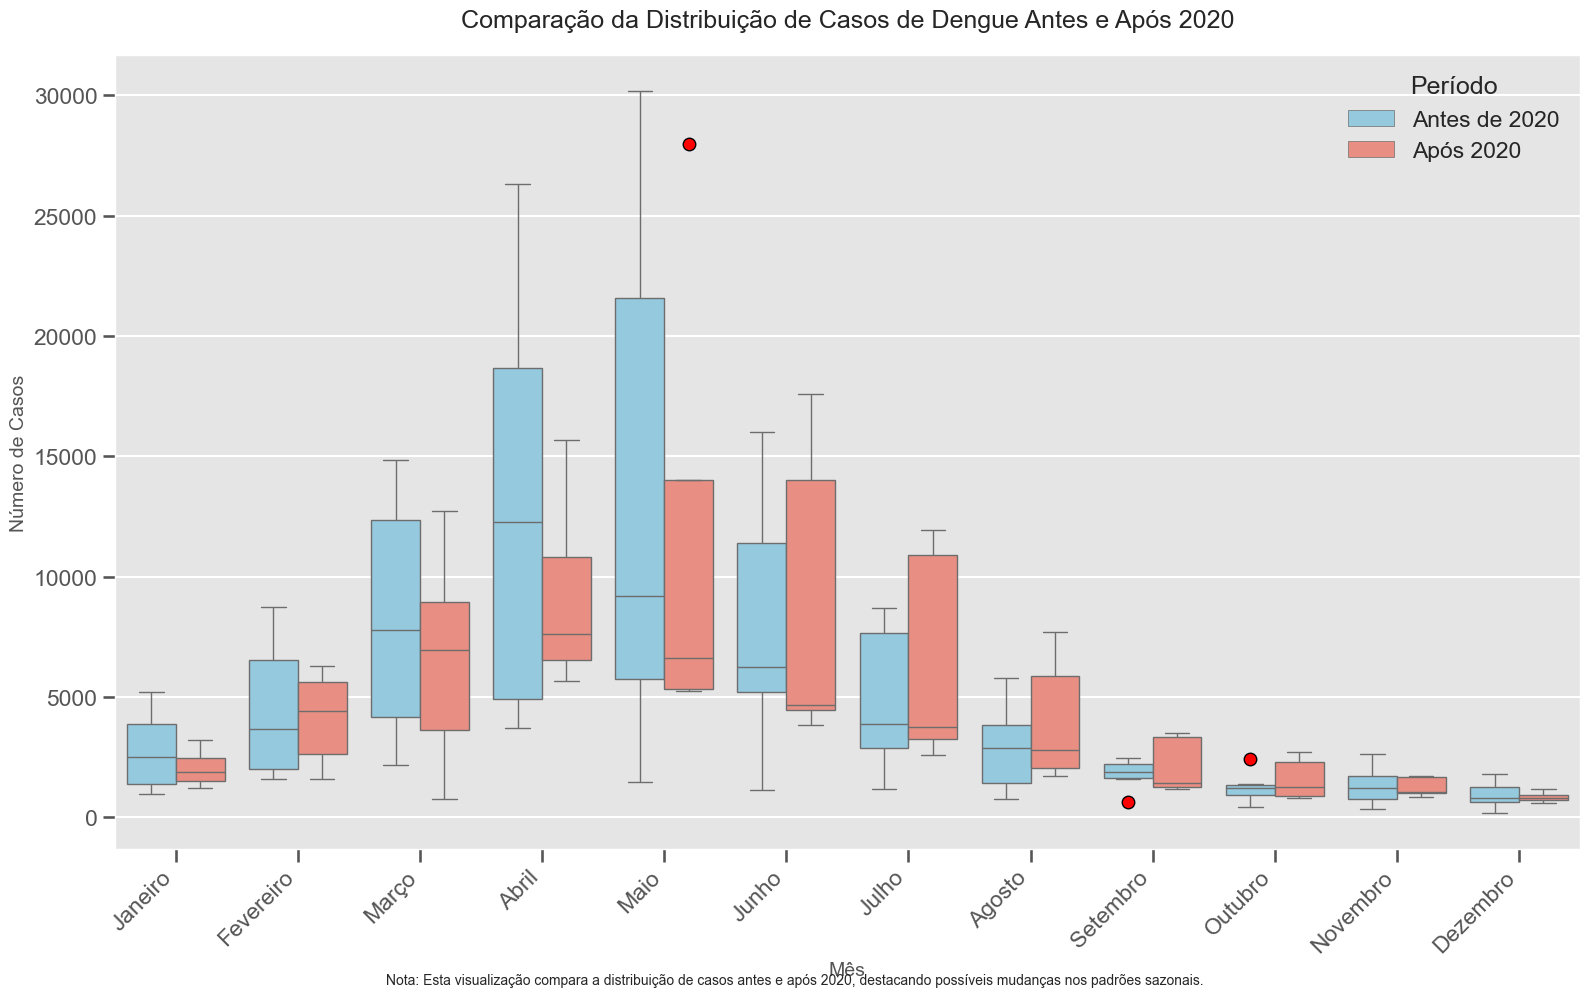

In [15]:
# Importar bibliotecas necessárias (se ainda não importadas)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.style.use('ggplot')

# Criar um dicionário para mapear números de meses para nomes
meses = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 
         6: 'Junho', 7: 'Julho', 8: 'Agosto', 9: 'Setembro', 
         10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

# -----------------------------------------
# BOX PLOT GERAL COM OUTLIERS POR MÊS
# -----------------------------------------
# Preparar dados para o boxplot
meses_analise = df.groupby(['mes', 'ano'])['casos'].sum().reset_index()
meses_analise['nome_mes'] = meses_analise['mes'].map(meses)

# Ordenar por mês para garantir a sequência correta
order = [meses[i] for i in range(1, 13)]

# Criar figura
plt.figure(figsize=(16, 10))

# Criar boxplot com outliers destacados
ax = sns.boxplot(x='nome_mes', y='casos', data=meses_analise, order=order, 
                 palette='coolwarm', showfliers=True, 
                 flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'black', 'markersize': 6})

# Adicionar pontos para mostrar a distribuição real dos dados
sns.stripplot(x='nome_mes', y='casos', data=meses_analise, order=order,
              color='black', alpha=0.3, size=4, jitter=True)

# Formatação do gráfico
plt.title('Distribuição de Casos de Dengue por Mês no Ceará (2014-2025)', fontsize=18, pad=20)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Número de Casos', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Identificar e anotar outliers significativos
for i, month in enumerate(order):
    month_data = meses_analise[meses_analise['nome_mes'] == month]['casos']
    
    # Calcular limites para outliers
    q1 = month_data.quantile(0.25)
    q3 = month_data.quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    
    # Encontrar outliers
    outliers = month_data[month_data > upper_bound]
    
    # Anotar os 3 maiores outliers (se existirem)
    if not outliers.empty:
        top_outliers = outliers.nlargest(3)
        for value in top_outliers:
            # Encontrar o ano correspondente a este outlier
            outlier_info = meses_analise[(meses_analise['nome_mes'] == month) & 
                                         (meses_analise['casos'] == value)]
            if not outlier_info.empty:
                ano = outlier_info.iloc[0]['ano']
                ax.annotate(f'{int(ano)}: {value:,.0f}', 
                            xy=(i, value), 
                            xytext=(5, 5),
                            textcoords='offset points',
                            fontsize=8,
                            color='darkred',
                            fontweight='bold')

# Adicionar texto explicativo
plt.figtext(0.5, 0.01, 
            'Nota: Os pontos vermelhos representam outliers (valores atípicos) na distribuição de casos. Anotações mostram o ano e o número de casos.',
            ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# -----------------------------------------
# BOX PLOT COM ESTATÍSTICAS DETALHADAS
# -----------------------------------------
# Criar figura para estatísticas detalhadas
plt.figure(figsize=(16, 12))

# Criar subplot grid
gs = plt.GridSpec(2, 1, height_ratios=[3, 1])

# Subplot superior: Box plot
ax1 = plt.subplot(gs[0])
sns.boxplot(x='nome_mes', y='casos', data=meses_analise, order=order, 
            palette='coolwarm', ax=ax1, showfliers=True,
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'black'})

# Formatação
ax1.set_title('Distribuição de Casos de Dengue por Mês no Ceará com Outliers', fontsize=18, pad=20)
ax1.set_xlabel('')  # Remover label do eixo x para o subplot superior
ax1.set_ylabel('Número de Casos', fontsize=14)
ax1.tick_params(axis='x', rotation=45, labelsize=12)

# Subplot inferior: Tabela de estatísticas
ax2 = plt.subplot(gs[1])
ax2.axis('tight')
ax2.axis('off')

# Calcular estatísticas para cada mês
stats_data = []
headers = ['Mês', 'Média', 'Mediana', 'Desvio Padrão', 'Mínimo', 'Máximo', 'Outliers']

for month in order:
    month_data = meses_analise[meses_analise['nome_mes'] == month]['casos']
    
    # Calcular limites para outliers
    q1 = month_data.quantile(0.25)
    q3 = month_data.quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    
    # Contar outliers
    outliers_count = sum(month_data > upper_bound)
    
    # Adicionar estatísticas à lista
    stats_data.append([
        month,
        f"{month_data.mean():.1f}",
        f"{month_data.median():.1f}",
        f"{month_data.std():.1f}",
        f"{month_data.min():.1f}",
        f"{month_data.max():.1f}",
        outliers_count
    ])

# Criar tabela
table = ax2.table(cellText=stats_data, colLabels=headers, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Colorir células da tabela baseado no número de outliers
for i, row in enumerate(stats_data):
    outliers = row[-1]
    if outliers > 0:
        table[(i+1, 6)].set_facecolor('#ffcccc')
        if outliers > 2:
            table[(i+1, 6)].set_facecolor('#ff9999')

plt.tight_layout()
plt.show()

# -----------------------------------------
# BOX PLOT COMPARATIVO ENTRE PERÍODOS
# -----------------------------------------
# Definir períodos (exemplo: antes e depois de 2020)
meses_analise['periodo'] = 'Antes de 2020'
meses_analise.loc[meses_analise['ano'] >= 2020, 'periodo'] = 'Após 2020'

# Criar figura
plt.figure(figsize=(16, 10))

# Criar boxplot com outliers destacados, comparando períodos
sns.boxplot(x='nome_mes', y='casos', hue='periodo', data=meses_analise, order=order, 
            palette=['skyblue', 'salmon'], showfliers=True,
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'black'})

# Formatação
plt.title('Comparação da Distribuição de Casos de Dengue Antes e Após 2020', fontsize=18, pad=20)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Número de Casos', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Período', loc='upper right')

# Adicionar texto explicativo
plt.figtext(0.5, 0.01, 
            'Nota: Esta visualização compara a distribuição de casos antes e após 2020, destacando possíveis mudanças nos padrões sazonais.',
            ha='center', fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\Windows\AppData\Local\Temp\ipykernel_16560\2628691316.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='nome_mes', y='casos', data=dados_mensais,


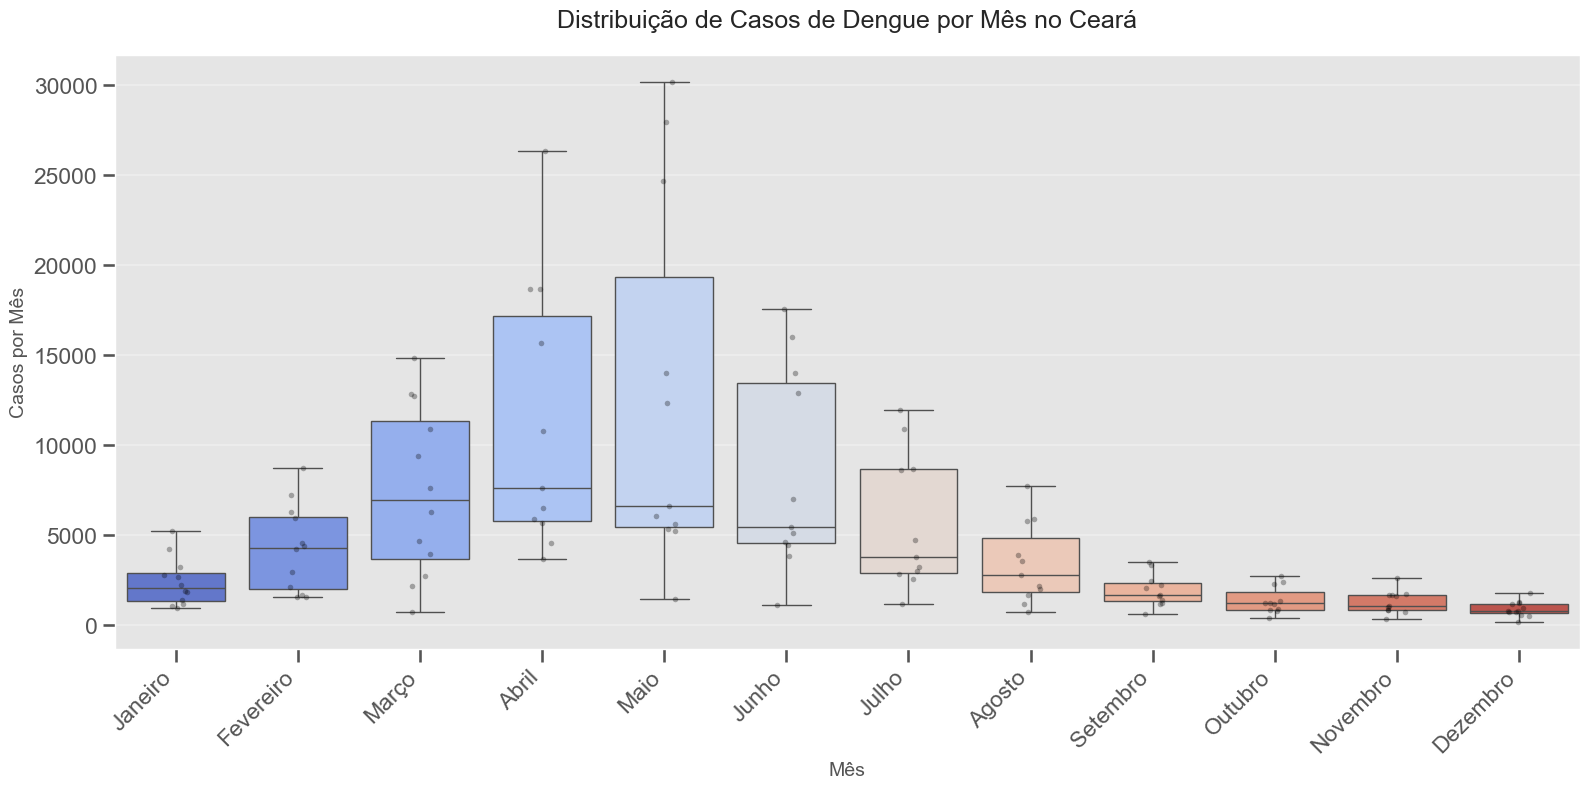

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('ggplot')

# Supondo que o DataFrame 'df' já esteja carregado e contenha as colunas: 'mes', 'ano' e 'casos'

# Criar um dicionário para mapear números de meses para nomes
meses = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 
         6: 'Junho', 7: 'Julho', 8: 'Agosto', 9: 'Setembro', 
         10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

# Adicionar o nome do mês ao DataFrame
df['nome_mes'] = df['mes'].map(meses)

# Agregar os dados por mês e ano (soma dos casos)
dados_mensais = df.groupby(['nome_mes', 'ano'])['casos'].sum().reset_index()

# Definir a ordem correta dos meses
ordem_meses = [meses[i] for i in range(1, 13)]

# Criar figura para o boxplot
plt.figure(figsize=(16, 8))
ax = sns.boxplot(x='nome_mes', y='casos', data=dados_mensais, 
                 order=ordem_meses, 
                 palette='coolwarm', 
                 showfliers=True)  # Mostrar outliers
                 
# Sobrepor os pontos individuais para visualizar a distribuição real
sns.stripplot(x='nome_mes', y='casos', data=dados_mensais,
              order=ordem_meses,
              color='black', alpha=0.3, size=4, jitter=True)

# Formatação do gráfico
plt.title('Distribuição de Casos de Dengue por Mês no Ceará', fontsize=18, pad=20)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Casos por Mês', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import plotly.express as px
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Carregar o conjunto de dados de dengue
df = pd.read_csv('dengue_ce_tratado.csv')

# Selecionar variáveis explicativas
variaveis = ['pop', 'tempmin', 'umidmax', 'tempmed', 'tempmax', 'umidmed', 'umidmin', 'p_inc100k', 'Rt']
X = df[variaveis]

# Selecionar a variável alvo
y = df['casos']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar os dados (importante para KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar e treinar o modelo KNN (K=5 é um valor comum)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
previsoes = knn.predict(X_test_scaled)

# Avaliação do modelo e visualização
mae = mean_absolute_error(y_test, previsoes)
mse = mean_squared_error(y_test, previsoes)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, previsoes)

print("Métricas de Desempenho:")
print(f"MAE  (Erro Absoluto Médio):       {mae:.2f}")
print(f"MSE  (Erro Quadrático Médio):     {mse:.2f}")
print(f"RMSE (Raiz do Erro Quadrático):   {rmse:.2f}")
print(f"R²   (Coeficiente de Determinação): {r2:.4f}")

# Criar gráfico de dispersão (valores reais vs. previstos)
fig_dispersao = px.scatter(x=y_test, y=previsoes,
                          title='Valores Reais vs. Previstos (KNN)',
                          labels={'x': 'Valores Reais', 'y': 'Valores Previstos'})

# Adicionar uma única linha de tendência
fig_dispersao.add_traces(px.scatter(x=y_test, y=previsoes, trendline='ols').data[1])

# Adicionar anotação com as métricas
fig_dispersao.add_annotation(
    x=0.02,
    y=0.98,
    xref='paper',
    yref='paper',
    text=f"MAE: {mae:.2f}<br>MSE: {mse:.2f}<br>RMSE: {rmse:.2f}<br>R²: {r2:.4f}",
    showarrow=False,
    font=dict(size=12),
    align='left',
    bgcolor='rgba(255, 255, 255, 0.8)',
    bordercolor='rgba(0, 0, 0, 0.3)',
    borderwidth=1,
    borderpad=4
)

fig_dispersao.show()

Métricas de Desempenho:
MAE  (Erro Absoluto Médio):       2.00
MSE  (Erro Quadrático Médio):     221.00
RMSE (Raiz do Erro Quadrático):   14.87
R²   (Coeficiente de Determinação): 0.9477
